# Master in Business Analytics &amp; Big Data - Master's thesis
## "Sales prediction and anomaly detection in times of COVID-19 using data from the stock market and the international press”

Full PDF can be read at this link:
<br>
https://www.linkedin.com/posts/sergio-carrasco-sanchez_final-masters-project-activity-6746471092820475904-YLCE

## Data loading and cleaning
### Sales data load

In [1]:
!pip install --upgrade pip

In [2]:
!pip install pandas

import pandas as pd

We proceed to load sales data from CSV file.

In [3]:
sales_data_df = pd.read_csv('./datasets/orders.csv')

In [4]:
sales_data_df

id                 date   user    payment_method  total  subtotal  \
0            1  2014-05-02 18:32:01  10614     bank_transfer   7.85      2.95   
1            2  2014-05-02 19:01:55  10614     bank_transfer   8.19      3.29   
2            3  2014-05-05 15:39:38  10615  cash_on_delivery  10.65      5.75   
3            7  2014-05-12 14:48:47  10619     bank_transfer   7.39      2.49   
4            8  2014-05-12 14:52:46  10619  cash_on_delivery   8.00      3.10   
...        ...                  ...    ...               ...    ...       ...   
119375  128481  2020-10-31 21:16:04  68077  cash_on_delivery  13.25      8.35   
119376  128482  2020-10-31 21:30:12  68078  cash_on_delivery  16.80     11.90   
119377  128483  2020-10-31 22:00:58  41554       credit_card  52.86     47.96   
119378  128484  2020-10-31 22:13:14  64540            paypal  23.25     18.35   
119379  128485  2020-10-31 23:21:35  48683  cash_on_delivery  81.25     81.25   

        discount  shipping_costs  
0            0.0             4.9  
1            0.0             4.9  
2            0.0             4.9  
3            0.0             4.9  
4            0.0             4.9  
...          ...             ...  
119375       0.0             4.9  
119376       0.0             4.9  
119377       0.0             4.9  
119378       0.0             4.9  
119379       0.0             0.0  

[119380 rows x 8 columns]

We remove the least interesting columns.

In [5]:
sales_data_df = sales_data_df.drop(['id', 'user', 'payment_method', 'subtotal', 'discount', 'shipping_costs'], axis=1)

In [6]:
sales_data_df = sales_data_df.rename({'total': 'sales'}, axis=1)

In [7]:
sales_data_df

date  sales
0       2014-05-02 18:32:01   7.85
1       2014-05-02 19:01:55   8.19
2       2014-05-05 15:39:38  10.65
3       2014-05-12 14:48:47   7.39
4       2014-05-12 14:52:46   8.00
...                     ...    ...
119375  2020-10-31 21:16:04  13.25
119376  2020-10-31 21:30:12  16.80
119377  2020-10-31 22:00:58  52.86
119378  2020-10-31 22:13:14  23.25
119379  2020-10-31 23:21:35  81.25

[119380 rows x 2 columns]

We group the sales by day.

In [8]:
def daily_sales(data):
    data = data.copy()
    data.date = data.date.apply(lambda x: str(x)[:-9])
    data = data.groupby('date')['sales'].sum().reset_index()
    data.date = pd.to_datetime(data.date)
    return data

In [9]:
daily_sales_df = daily_sales(sales_data_df)

In [10]:
daily_sales_df

date    sales
0    2014-05-02    16.04
1    2014-05-05    10.65
2    2014-05-12    53.54
3    2014-05-13   135.45
4    2014-05-15   144.89
...         ...      ...
2337 2020-10-27  4016.97
2338 2020-10-28  4641.49
2339 2020-10-29  3006.00
2340 2020-10-30  2181.25
2341 2020-10-31  1037.26

[2342 rows x 2 columns]

In [11]:
daily_sales_df = daily_sales_df.set_index(daily_sales_df.date)

In [12]:
daily_sales_df = daily_sales_df.drop('date', axis=1)

In [13]:
daily_sales_df

sales
date               
2014-05-02    16.04
2014-05-05    10.65
2014-05-12    53.54
2014-05-13   135.45
2014-05-15   144.89
...             ...
2020-10-27  4016.97
2020-10-28  4641.49
2020-10-29  3006.00
2020-10-30  2181.25
2020-10-31  1037.26

[2342 rows x 1 columns]

### Nasdaq Composite Index Data Load

We import the  Composite index data from the same time period as the sales data.

In [14]:
!pip install yfinance

import yfinance as yf

In [15]:
min_date = min(daily_sales_df.index)
max_date = max(daily_sales_df.index)

In [16]:
min_date

Timestamp('2014-05-02 00:00:00')

In [17]:
max_date

Timestamp('2020-10-31 00:00:00')

In [18]:
ticker = '^IXIC'
ticker_name = 'NASDAQ Composite'

In [19]:
stock_data_df = yf.download(ticker, start=min_date, end=max_date)

[*********************100%***********************]  1 of 1 completed


In [20]:
stock_data_df.reset_index(inplace=True)

In [21]:
stock_data_df['Date'] = stock_data_df['Date'].dt.date

In [22]:
stock_data_df = stock_data_df.set_index(stock_data_df['Date'])

In [23]:
stock_data_df = stock_data_df.drop(['Date'], axis=1)

In [24]:
stock_data_df.index.name = 'date'

In [25]:
stock_data_df

Open          High           Low         Close  \
date                                                                 
2014-05-02   4138.629883   4145.060059   4115.890137   4123.899902   
2014-05-05   4099.250000   4138.339844   4086.350098   4138.060059   
2014-05-06   4128.220215   4132.459961   4080.760010   4080.760010   
2014-05-07   4085.489990   4091.030029   4021.050049   4067.669922   
2014-05-08   4053.280029   4109.200195   4039.909912   4051.500000   
...                  ...           ...           ...           ...   
2020-10-26  11440.639648  11545.629883  11221.059570  11358.940430   
2020-10-27  11409.339844  11465.059570  11361.860352  11431.349609   
2020-10-28  11230.900391  11249.950195  10999.070312  11004.870117   
2020-10-29  11064.469727  11287.629883  11030.190430  11185.589844   
2020-10-30  11103.469727  11129.809570  10822.570312  10911.589844   

               Adj Close      Volume  
date                                  
2014-05-02   4123.899902  1844790000  
2014-05-05   4138.060059  1561170000  
2014-05-06   4080.760010  1850610000  
2014-05-07   4067.669922  2486030000  
2014-05-08   4051.500000  2411940000  
...                  ...         ...  
2020-10-26  11358.940430  3186950000  
2020-10-27  11431.349609  3079530000  
2020-10-28  11004.870117  3912580000  
2020-10-29  11185.589844  3222460000  
2020-10-30  10911.589844  3662840000  

[1638 rows x 6 columns]

We combine the sales data and the index data in the same dataframe.

In [26]:
daily_sales_df = pd.merge(left=daily_sales_df,
                          right=stock_data_df,
                          left_index=True,
                          right_index=True,
                          how='inner')

In [27]:
daily_sales_df = daily_sales_df.rename({'Open':'stock_open',
                                        'High':'stock_high',
                                        'Low':'stock_low',
                                        'Close':'stock_close',
                                        'Adj Close':'stock_adjclose',
                                        'Volume':'stock_volume'},
                                       axis=1)

In [28]:
daily_sales_df = daily_sales_df[['sales',
                                 'stock_open',
                                 'stock_high',
                                 'stock_low',
                                 'stock_close',
                                 'stock_adjclose',
                                 'stock_volume']]

In [29]:
daily_sales_df

sales    stock_open    stock_high     stock_low   stock_close  \
date                                                                          
2014-05-02    16.04   4138.629883   4145.060059   4115.890137   4123.899902   
2014-05-05    10.65   4099.250000   4138.339844   4086.350098   4138.060059   
2014-05-12    53.54   4092.840088   4146.540039   4092.090088   4143.859863   
2014-05-13   135.45   4144.899902   4155.129883   4128.009766   4130.169922   
2014-05-15   144.89   4096.529785   4098.250000   4035.959961   4069.290039   
...             ...           ...           ...           ...           ...   
2020-10-26  4176.29  11440.639648  11545.629883  11221.059570  11358.940430   
2020-10-27  4016.97  11409.339844  11465.059570  11361.860352  11431.349609   
2020-10-28  4641.49  11230.900391  11249.950195  10999.070312  11004.870117   
2020-10-29  3006.00  11064.469727  11287.629883  11030.190430  11185.589844   
2020-10-30  2181.25  11103.469727  11129.809570  10822.570312  10911.589844   

            stock_adjclose  stock_volume  
date                                      
2014-05-02     4123.899902    1844790000  
2014-05-05     4138.060059    1561170000  
2014-05-12     4143.859863    1880020000  
2014-05-13     4130.169922    1923480000  
2014-05-15     4069.290039    2083030000  
...                    ...           ...  
2020-10-26    11358.940430    3186950000  
2020-10-27    11431.349609    3079530000  
2020-10-28    11004.870117    3912580000  
2020-10-29    11185.589844    3222460000  
2020-10-30    10911.589844    3662840000  

[1619 rows x 7 columns]

### Loading data from the digital newspaper "The Economic Times"

In [30]:
!pip install requests
!pip install beautifulsoup4

import requests
from bs4 import BeautifulSoup
import time
import datetime
from dateutil import rrule
from calendar import monthrange
import csv

In [31]:
def read_url(year, month, starttime):
    url = f'https://economictimes.indiatimes.com/archivelist/year-{year},month-{month},starttime-{starttime}.cms'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')    
    return soup

In [32]:
def get_starttime(year, month, day):
    date1 = '1899-12-30'
    timestamp1 = time.mktime(datetime.datetime.strptime(date1, '%Y-%m-%d').timetuple())
    
    date2 = str(year) + '-' + str(month) + '-' + str(day)
    timestamp2 = time.mktime(datetime.datetime.strptime(date2, '%Y-%m-%d').timetuple())
    
    starttime = ((timestamp2 - timestamp1) / 86400)
    return str(starttime).replace(".0", "")

In [33]:
headlines_from = '2020-01-01'
headlines_to = '2020-10-31'

In [34]:
headlines_datetime_from = datetime.datetime.strptime(headlines_from, '%Y-%m-%d')
headlines_datetime_to = datetime.datetime.strptime(headlines_to, '%Y-%m-%d')

In [35]:
"""
for dt in rrule.rrule(rrule.MONTHLY, dtstart=headlines_datetime_from, until=headlines_datetime_to):
    year = int(dt.strftime('%Y'))
    month = int(dt.strftime('%m'))
    
    for day in range(1, (monthrange(year, month)[1] + 1)):
        starttime = get_starttime(year, month, day)
        date_str_eng = str(year) + '-' + '{:02d}'.format(month) + '-' + '{:02d}'.format(day)
        
        # print(f'Date: {year}-{month}-{day}')
        
        headlines = []

        soup = read_url(year, month, starttime)

        for td in soup.findAll('td', {'class':'contentbox5'}):
            for headline in td.findAll('a'):
                if 'archive' not in headline.get('href'):
                    if len(headline.contents) > 0:
                        if headline.contents[0] not in headlines:
                            headlines.append(headline.contents[0])

        time.sleep(1)

        file = open(f'./datasets/economic_news_headlines_{date_str_eng}.csv', 'w')
        with file:
            write = csv.writer(file, escapechar='\\', quoting=csv.QUOTE_NONE)
            for item in headlines:
                write.writerow([item,])
"""

"\nfor dt in rrule.rrule(rrule.MONTHLY, dtstart=headlines_datetime_from, until=headlines_datetime_to):\n    year = int(dt.strftime('%Y'))\n    month = int(dt.strftime('%m'))\n    \n    for day in range(1, (monthrange(year, month)[1] + 1)):\n        starttime = get_starttime(year, month, day)\n        date_str_eng = str(year) + '-' + '{:02d}'.format(month) + '-' + '{:02d}'.format(day)\n        \n        # print(f'Date: {year}-{month}-{day}')\n        \n        headlines = []\n\n        soup = read_url(year, month, starttime)\n\n        for td in soup.findAll('td', {'class':'contentbox5'}):\n            for headline in td.findAll('a'):\n                if 'archive' not in headline.get('href'):\n                    if len(headline.contents) > 0:\n                        if headline.contents[0] not in headlines:\n                            headlines.append(headline.contents[0])\n\n        time.sleep(1)\n\n        file = open(f'./datasets/economic_news_headlines_{date_str_eng}.csv', 'w')\n

We detect negative words found in economic news headlines.

In [36]:
!pip install stop-words

from stop_words import get_stop_words
import collections

In [37]:
stop_words = get_stop_words('en')

In [38]:
banned_chars = ['\\', '`', '"', '*', '_', '{', '}', '[', ']', '(', ')', '>', '#',
                '+', ':', '-', '.', ',', '¿', '?', '¡', '!', '$', '\'', '«', '»', '|']

In [39]:
negative_economic_words = ['coronavirus', 'sars-cov-2', 'covid-19', 'covid19', 'virus', 'pandemic',
                           'lockdown', 'outbreak', 'curfew', 'quarantine', 'crisis', 'fears', 'violence',
                           'death', 'cases', 'fall', 'hit', 'impact']

In [40]:
number_common_words = 20

In [41]:
negative_economic_words_df = pd.DataFrame(columns=['date', 'negative_economic_words'])

In [42]:
date_from = '2020-01-01'
date_to = '2020-10-31'

In [43]:
for date in pd.date_range(date_from, date_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    
    # print(f'Date: {date_str_eng}')
    # print()
    
    file = open(f'./datasets/economic_news_headlines_{date_str_eng}.csv', 'rt')

    headlines = []
    
    with file:
        csv_reader = csv.reader(file, escapechar='\\')

        for line in csv_reader:
            headlines.append(line)
    
    word_count = {}
    
    for headline in headlines:
        for word in headline[0].lower().split():
            for ch in banned_chars:
                if ch in word:
                    word = word.replace(ch, '')

            if (word != '') & (word not in stop_words):
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
    
    negative_words_count = 0
    word_counter = collections.Counter(word_count)
    
    # print(f"Top {number_common_words} most common words:")
    # print()
    
    for word, count in word_counter.most_common(number_common_words):
        # print(f'{word}: {count}')

        if word in negative_economic_words:
            negative_words_count += count
    
    # print()
    # print(f"Negative words: {negative_words_count}")
    # print()
    
    negative_economic_words_df = negative_economic_words_df.append({'date':date,
                                                                    'negative_economic_words':negative_words_count},
                                                                   ignore_index=True)

In [44]:
negative_economic_words_df

date negative_economic_words
0   2020-01-01                       0
1   2020-01-02                       0
2   2020-01-03                       0
3   2020-01-04                       0
4   2020-01-05                       0
..         ...                     ...
300 2020-10-27                      12
301 2020-10-28                      27
302 2020-10-29                       0
303 2020-10-30                      26
304 2020-10-31                      11

[305 rows x 2 columns]

In [45]:
negative_economic_words_df.to_csv('./datasets/negative_economic_words.csv', index=False)

We create a word cloud with all the negative words extracted from the press headlines.

In [46]:
headlines = []

In [47]:
for date in pd.date_range(date_from, date_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    
    file = open(f'./datasets/economic_news_headlines_{date_str_eng}.csv', 'rt')

    with file:
        csv_reader = csv.reader(file, escapechar='\\')

        for line in csv_reader:
            headlines.append(line)

In [48]:
word_count = {}
negative_word_count = {}

for headline in headlines:
    for word in headline[0].lower().split():
        for ch in banned_chars:
            if ch in word:
                word = word.replace(ch, '')
        
        if (word != '') & (word not in stop_words):
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
            
            if word in negative_economic_words:
                if word not in negative_word_count:
                    negative_word_count[word] = 1
                else:
                    negative_word_count[word] += 1

In [49]:
number_common_words = 25

word_counter = collections.Counter(word_count)
negative_word_counter = collections.Counter(negative_word_count)

most_common_words = {}
most_common_negative_words = {}

for word, count in word_counter.most_common(number_common_words):
    most_common_words[word] = count

for word, count in negative_word_counter.most_common(number_common_words):
    most_common_negative_words[word] = count
    print(f'{word}: {count}')

covid19: 5305
coronavirus: 3830
lockdown: 2064
cases: 1453
hit: 1200
pandemic: 1065
virus: 981
impact: 846
fall: 762
crisis: 606
death: 575
outbreak: 384
fears: 322
quarantine: 257
violence: 214
curfew: 76


In [50]:
!pip install wordcloud
!pip install matplotlib

from wordcloud import WordCloud
import matplotlib.pyplot as plt

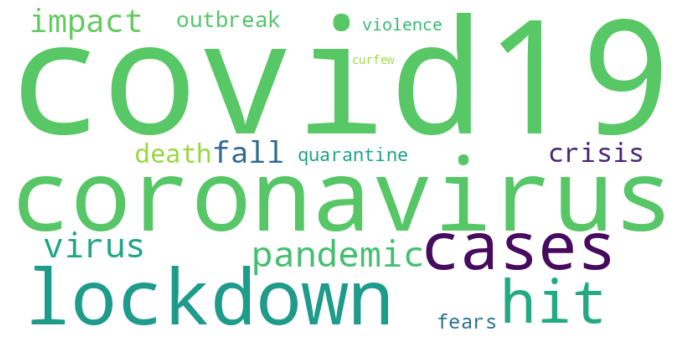

In [51]:
wc = WordCloud(background_color='white',
               max_font_size=256,
               random_state=42,
               width=800,
               height=400
              ).generate_from_frequencies(most_common_negative_words)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

We create the "negative_economic_words_df" dataframe that contains the number of negative words in the economic press from January to October 2020, and we join this data to the "daily_sales_df" dataframe that already contained the sales and Nasdaq Composite index values for the same period of time.

In [52]:
negative_economic_words_csv_df = pd.read_csv('./datasets/negative_economic_words.csv')

In [53]:
negative_economic_words_csv_df = negative_economic_words_csv_df.set_index(negative_economic_words_csv_df.date)

In [54]:
negative_economic_words_csv_df = negative_economic_words_csv_df.drop('date', axis=1)

In [55]:
negative_economic_words_df = pd.DataFrame(columns=['date'])

In [56]:
for date in pd.date_range(min_date, max_date, freq='d'):
    negative_economic_words_df = negative_economic_words_df.append({'date':date}, ignore_index=True)

In [57]:
negative_economic_words_df = negative_economic_words_df.set_index(negative_economic_words_df.date)

In [58]:
negative_economic_words_df = negative_economic_words_df.drop('date', axis=1)

In [59]:
negative_economic_words_df = pd.merge(left=negative_economic_words_df,
                                      right=negative_economic_words_csv_df[{'negative_economic_words'}],
                                      left_index=True,
                                      right_index=True,
                                      how='outer')

In [60]:
negative_economic_words_df = negative_economic_words_df.fillna(0)

In [61]:
negative_economic_words_df[{'negative_economic_words'}]

negative_economic_words
date                               
2014-05-02                      0.0
2014-05-03                      0.0
2014-05-04                      0.0
2014-05-05                      0.0
2014-05-06                      0.0
...                             ...
2020-10-27                     12.0
2020-10-28                     27.0
2020-10-29                      0.0
2020-10-30                     26.0
2020-10-31                     11.0

[2375 rows x 1 columns]

In [62]:
daily_sales_df

sales    stock_open    stock_high     stock_low   stock_close  \
date                                                                          
2014-05-02    16.04   4138.629883   4145.060059   4115.890137   4123.899902   
2014-05-05    10.65   4099.250000   4138.339844   4086.350098   4138.060059   
2014-05-12    53.54   4092.840088   4146.540039   4092.090088   4143.859863   
2014-05-13   135.45   4144.899902   4155.129883   4128.009766   4130.169922   
2014-05-15   144.89   4096.529785   4098.250000   4035.959961   4069.290039   
...             ...           ...           ...           ...           ...   
2020-10-26  4176.29  11440.639648  11545.629883  11221.059570  11358.940430   
2020-10-27  4016.97  11409.339844  11465.059570  11361.860352  11431.349609   
2020-10-28  4641.49  11230.900391  11249.950195  10999.070312  11004.870117   
2020-10-29  3006.00  11064.469727  11287.629883  11030.190430  11185.589844   
2020-10-30  2181.25  11103.469727  11129.809570  10822.570312  10911.589844   

            stock_adjclose  stock_volume  
date                                      
2014-05-02     4123.899902    1844790000  
2014-05-05     4138.060059    1561170000  
2014-05-12     4143.859863    1880020000  
2014-05-13     4130.169922    1923480000  
2014-05-15     4069.290039    2083030000  
...                    ...           ...  
2020-10-26    11358.940430    3186950000  
2020-10-27    11431.349609    3079530000  
2020-10-28    11004.870117    3912580000  
2020-10-29    11185.589844    3222460000  
2020-10-30    10911.589844    3662840000  

[1619 rows x 7 columns]

In [63]:
daily_sales_df = pd.merge(left=daily_sales_df,
                          right=negative_economic_words_df,
                          left_index=True,
                          right_index=True,
                          how='inner')

In [64]:
daily_sales_df

sales    stock_open    stock_high     stock_low   stock_close  \
date                                                                          
2014-05-02    16.04   4138.629883   4145.060059   4115.890137   4123.899902   
2014-05-05    10.65   4099.250000   4138.339844   4086.350098   4138.060059   
2014-05-12    53.54   4092.840088   4146.540039   4092.090088   4143.859863   
2014-05-13   135.45   4144.899902   4155.129883   4128.009766   4130.169922   
2014-05-15   144.89   4096.529785   4098.250000   4035.959961   4069.290039   
...             ...           ...           ...           ...           ...   
2020-10-26  4176.29  11440.639648  11545.629883  11221.059570  11358.940430   
2020-10-27  4016.97  11409.339844  11465.059570  11361.860352  11431.349609   
2020-10-28  4641.49  11230.900391  11249.950195  10999.070312  11004.870117   
2020-10-29  3006.00  11064.469727  11287.629883  11030.190430  11185.589844   
2020-10-30  2181.25  11103.469727  11129.809570  10822.570312  10911.589844   

            stock_adjclose  stock_volume  negative_economic_words  
date                                                               
2014-05-02     4123.899902    1844790000                      0.0  
2014-05-05     4138.060059    1561170000                      0.0  
2014-05-12     4143.859863    1880020000                      0.0  
2014-05-13     4130.169922    1923480000                      0.0  
2014-05-15     4069.290039    2083030000                      0.0  
...                    ...           ...                      ...  
2020-10-26    11358.940430    3186950000                     14.0  
2020-10-27    11431.349609    3079530000                     12.0  
2020-10-28    11004.870117    3912580000                     27.0  
2020-10-29    11185.589844    3222460000                      0.0  
2020-10-30    10911.589844    3662840000                     26.0  

[1619 rows x 8 columns]

We check the contrast between the values of the "sales" and "negative_economic_words" columns, mainly as of March 13.

In [65]:
daily_sales_df[(daily_sales_df.index >= '2020-03-01') & (daily_sales_df.index <= '2020-03-31')]

sales   stock_open   stock_high    stock_low  stock_close  \
date                                                                      
2020-03-02  3983.71  8667.139648  8952.809570  8543.349609  8952.169922   
2020-03-03  3447.97  8965.099609  9070.320312  8602.889648  8684.089844   
2020-03-04  4213.73  8834.099609  9019.959961  8757.660156  9018.089844   
2020-03-05  2616.82  8790.089844  8921.080078  8677.389648  8738.589844   
2020-03-06  1265.74  8469.019531  8612.360352  8375.129883  8575.620117   
2020-03-09  2952.63  7957.930176  8243.309570  7943.160156  7950.680176   
2020-03-10  3709.14  8219.759766  8347.400391  7930.430176  8344.250000   
2020-03-11  3652.05  8136.250000  8181.359863  7850.950195  7952.049805   
2020-03-12  1771.23  7398.580078  7712.330078  7194.669922  7201.799805   
2020-03-13   677.22  7610.390137  7875.930176  7219.089844  7874.879883   
2020-03-16   537.20  7392.729980  7422.200195  6882.859863  6904.589844   
2020-03-17   903.50  7072.000000  7406.229980  6828.910156  7334.779785   
2020-03-18   922.83  6902.319824  7182.830078  6686.359863  6989.839844   
2020-03-19   604.05  6996.450195  7341.379883  6858.379883  7150.580078   
2020-03-20   970.59  7248.069824  7354.439941  6854.669922  6879.520020   
2020-03-23   787.02  6847.279785  6984.939941  6631.419922  6860.669922   
2020-03-24  1290.16  7196.149902  7418.370117  7169.859863  7417.859863   
2020-03-25  1262.65  7421.359863  7671.209961  7276.399902  7384.299805   
2020-03-26  1807.88  7462.209961  7809.830078  7462.209961  7797.540039   
2020-03-27   851.09  7554.250000  7716.240234  7491.140137  7502.379883   
2020-03-30  2252.41  7583.459961  7784.350098  7539.970215  7774.149902   
2020-03-31  1676.39  7740.060059  7880.310059  7642.859863  7700.100098   

            stock_adjclose  stock_volume  negative_economic_words  
date                                                               
2020-03-02     8952.169922    4232760000                     44.0  
2020-03-03     8684.089844    4336700000                     45.0  
2020-03-04     9018.089844    3602870000                     60.0  
2020-03-05     8738.589844    3748090000                     59.0  
2020-03-06     8575.620117    4279850000                     40.0  
2020-03-09     7950.680176    4530350000                     34.0  
2020-03-10     8344.250000    4431930000                     29.0  
2020-03-11     7952.049805    4273890000                     67.0  
2020-03-12     7201.799805    5066530000                    119.0  
2020-03-13     7874.879883    4685890000                     85.0  
2020-03-16     6904.589844    4594360000                     93.0  
2020-03-17     7334.779785    4900000000                    104.0  
2020-03-18     6989.839844    4890820000                    132.0  
2020-03-19     7150.580078    4762170000                    148.0  
2020-03-20     6879.520020    5239940000                    120.0  
2020-03-23     6860.669922    4330610000                    168.0  
2020-03-24     7417.859863    4417380000                    193.0  
2020-03-25     7384.299805    4666440000                    194.0  
2020-03-26     7797.540039    3999850000                    175.0  
2020-03-27     7502.379883    3977010000                    164.0  
2020-03-30     7774.149902    3846900000                    148.0  
2020-03-31     7700.100098    4059700000                    127.0

### Loading data from the digital newspaper ABC.es

In [66]:
def read_url(date, page):
    url = f'https://www.abc.es/hemeroteca/dia-{date}/pagina-{page}'
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    html = soup.text
    contents = not("Sugerencias" in html)
    return contents, soup

In [67]:
headlines_from = '2020-01-01'
headlines_to = '2020-10-31'

In [68]:
headlines_timestamp_from = datetime.datetime.strptime(headlines_from, '%Y-%m-%d')
headlines_timestamp_to = datetime.datetime.strptime(headlines_to, '%Y-%m-%d')

In [69]:
"""
for date in pd.date_range(headlines_timestamp_from, headlines_timestamp_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    date_str_spa = date.strftime('%d-%m-%Y')
    
    # print(f'Date: {date_str_eng}')
    # print()
    
    headlines = []
    page = 1
    
    contents, soup = read_url(date_str_spa, page)
    
    while contents:
        # print(f'Page: {page}')
        # print()
        for headline in soup.findAll('a', {'class':'titulo'}):
            # print(headline.contents[0])
            headlines.append(headline.contents[0])            
        time.sleep(1)
        page += 1
        contents, soup = read_url(date_str_spa, page)
        # print()
    
    file = open(f'./datasets/news_headlines_{date_str_eng}.csv', 'w')
    
    with file:
        write = csv.writer(file, escapechar='\\', quoting=csv.QUOTE_NONE)
        for item in headlines:
            write.writerow([item,])
"""

"\nfor date in pd.date_range(headlines_timestamp_from, headlines_timestamp_to, freq='d'):\n    date_str_eng = date.strftime('%Y-%m-%d')\n    date_str_spa = date.strftime('%d-%m-%Y')\n    \n    # print(f'Date: {date_str_eng}')\n    # print()\n    \n    headlines = []\n    page = 1\n    \n    contents, soup = read_url(date_str_spa, page)\n    \n    while contents:\n        # print(f'Page: {page}')\n        # print()\n        for headline in soup.findAll('a', {'class':'titulo'}):\n            # print(headline.contents[0])\n            headlines.append(headline.contents[0])            \n        time.sleep(1)\n        page += 1\n        contents, soup = read_url(date_str_spa, page)\n        # print()\n    \n    file = open(f'./datasets/news_headlines_{date_str_eng}.csv', 'w')\n    \n    with file:\n        write = csv.writer(file, escapechar='\\', quoting=csv.QUOTE_NONE)\n        for item in headlines:\n            write.writerow([item,])\n"

The "stop_words" and "banned_chars" lists are built with the words (in Spanish) and symbols to avoid, and "negative_words" with the most common negative words (in Spanish) to be counted.

In [70]:
stop_words = get_stop_words('es')

In [71]:
banned_chars = ['\\', '`', '"', '*', '_', '{', '}', '[', ']', '(', ')', '>', '#',
                '+', ':', '-', '.', ',', '¿', '?', '¡', '!', '$', '\'', '«', '»', '|']

In [72]:
negative_words = ['coronavirus', 'sars-cov-2', 'covid-19', 'covid19', 'crisis', 'recesión', 'quiebra', 'caída',
                  'erte', 'ertes', 'cierre', 'cierra', 'ruina', 'alarma', 'medidas', 'casos', 'cuarentena', 'confinamiento',
                  'colapso', 'contagios', 'pandemia', 'epidemia', 'muertos', 'muertes', 'muere', 'fallecidos']

In [73]:
number_common_words = 25

In [74]:
negative_words_df = pd.DataFrame(columns=['date', 'negative_words'])

In [75]:
date_from = '2020-01-01'
date_to = '2020-10-31'

In [76]:
for date in pd.date_range(date_from, date_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    
    # print(f'Date: {date_str_eng}')
    # print()
    
    file = open(f'./datasets/news_headlines_{date_str_eng}.csv', 'rt')

    headlines = []
    
    with file:
        csv_reader = csv.reader(file, escapechar='\\')

        for line in csv_reader:
            headlines.append(line)
    
    word_count = {}
    
    for headline in headlines:
        for word in headline[0].lower().split():
            for ch in banned_chars:
                if ch in word:
                    word = word.replace(ch, '')

            if (word != '') & (word not in stop_words):
                if word not in word_count:
                    word_count[word] = 1
                else:
                    word_count[word] += 1
    
    negative_words_count = 0
    word_counter = collections.Counter(word_count)
    
    # print(f"Top {number_common_words} most common words:")
    # print()
    
    for word, count in word_counter.most_common(number_common_words):
        # print(f'{word}: {count}')

        if word in negative_words:
            negative_words_count += count
    
    # print()
    # print(f"Negative words: {negative_words_count}")
    # print()
    
    negative_words_df = negative_words_df.append({'date':date, 'negative_words':negative_words_count}, ignore_index=True)

In [77]:
negative_words_df

date negative_words
0   2020-01-01              0
1   2020-01-02             13
2   2020-01-03              7
3   2020-01-04              0
4   2020-01-05              0
..         ...            ...
300 2020-10-27             51
301 2020-10-28             70
302 2020-10-29             91
303 2020-10-30             69
304 2020-10-31             51

[305 rows x 2 columns]

In [78]:
negative_words_df.to_csv('./datasets/negative_words.csv', index=False)

We make a word cloud with all the negative words extracted from the press headlines.

In [79]:
headlines = []

In [80]:
for date in pd.date_range(date_from, date_to, freq='d'):
    date_str_eng = date.strftime('%Y-%m-%d')
    
    file = open(f'./datasets/news_headlines_{date_str_eng}.csv', 'rt')

    with file:
        csv_reader = csv.reader(file, escapechar='\\')

        for line in csv_reader:
            headlines.append(line)

In [81]:
word_count = {}
negative_word_count = {}

for headline in headlines:
    for word in headline[0].lower().split():
        for ch in banned_chars:
            if ch in word:
                word = word.replace(ch, '')

        if (word != '') & (word not in stop_words):
            if word not in word_count:
                word_count[word] = 1
            else:
                word_count[word] += 1
            
            if word in negative_words:
                if word not in negative_word_count:
                    negative_word_count[word] = 1
                else:
                    negative_word_count[word] += 1

In [82]:
number_common_words = 25

word_counter = collections.Counter(word_count)
negative_word_counter = collections.Counter(negative_word_count)

most_common_words = {}
most_common_negative_words = {}

for word, count in word_counter.most_common(number_common_words):
    most_common_words[word] = count

for word, count in negative_word_counter.most_common(number_common_words):
    most_common_negative_words[word] = count
    print(f'{word}: {count}')

coronavirus: 10362
covid19: 3121
casos: 1674
confinamiento: 1573
pandemia: 1511
alarma: 1346
crisis: 1324
muere: 1176
medidas: 1162
contagios: 1077
muertos: 933
fallecidos: 928
cuarentena: 752
cierre: 511
muertes: 462
cierra: 461
erte: 428
caída: 271
epidemia: 163
colapso: 101
ertes: 64
recesión: 47
ruina: 39
quiebra: 32


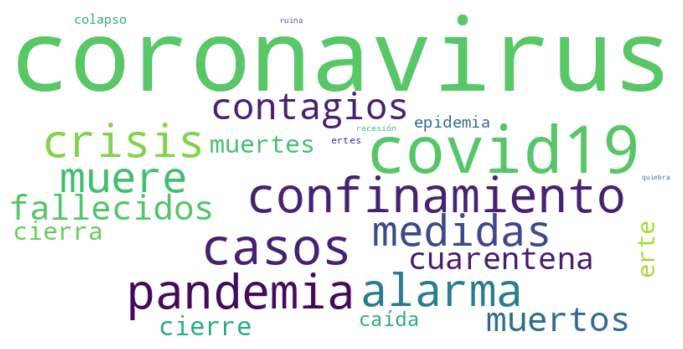

In [83]:
wc = WordCloud(background_color='white',
               max_font_size=256,
               random_state=42,
               width=800,
               height=400
              ).generate_from_frequencies(most_common_negative_words)
plt.figure(figsize=(12, 8))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

Finally, the "negative_words_df" dataframe is created that contains the number of negative words in the general press from January to October 2020, and this data is joined to the "daily_sales_df" dataframe that already contained the sales values, of the Nasdaq index. Composite and the number of negative words in the economic press for the same period of time.

In [84]:
negative_words_csv_df = pd.read_csv('./datasets/negative_words.csv')

In [85]:
negative_words_csv_df = negative_words_csv_df.set_index(negative_words_csv_df.date)

In [86]:
negative_words_csv_df = negative_words_csv_df.drop('date', axis=1)

In [87]:
negative_words_df = pd.DataFrame(columns=['date'])

In [88]:
for date in pd.date_range(min_date, max_date, freq='d'):
    negative_words_df = negative_words_df.append({'date':date}, ignore_index=True)

In [89]:
negative_words_df = negative_words_df.set_index(negative_words_df.date)

In [90]:
negative_words_df = negative_words_df.drop('date', axis=1)

In [91]:
negative_words_df = pd.merge(left=negative_words_df,
                             right=negative_words_csv_df[{'negative_words'}],
                             left_index=True,
                             right_index=True, how='outer')

In [92]:
negative_words_df = negative_words_df.fillna(0)

In [93]:
daily_sales_df = pd.merge(left=daily_sales_df,
                          right=negative_words_df[{'negative_words'}],
                          left_index=True,
                          right_index=True,
                          how='inner')

In [94]:
daily_sales_df

sales    stock_open    stock_high     stock_low   stock_close  \
date                                                                          
2014-05-02    16.04   4138.629883   4145.060059   4115.890137   4123.899902   
2014-05-05    10.65   4099.250000   4138.339844   4086.350098   4138.060059   
2014-05-12    53.54   4092.840088   4146.540039   4092.090088   4143.859863   
2014-05-13   135.45   4144.899902   4155.129883   4128.009766   4130.169922   
2014-05-15   144.89   4096.529785   4098.250000   4035.959961   4069.290039   
...             ...           ...           ...           ...           ...   
2020-10-26  4176.29  11440.639648  11545.629883  11221.059570  11358.940430   
2020-10-27  4016.97  11409.339844  11465.059570  11361.860352  11431.349609   
2020-10-28  4641.49  11230.900391  11249.950195  10999.070312  11004.870117   
2020-10-29  3006.00  11064.469727  11287.629883  11030.190430  11185.589844   
2020-10-30  2181.25  11103.469727  11129.809570  10822.570312  10911.589844   

            stock_adjclose  stock_volume  negative_economic_words  \
date                                                                
2014-05-02     4123.899902    1844790000                      0.0   
2014-05-05     4138.060059    1561170000                      0.0   
2014-05-12     4143.859863    1880020000                      0.0   
2014-05-13     4130.169922    1923480000                      0.0   
2014-05-15     4069.290039    2083030000                      0.0   
...                    ...           ...                      ...   
2020-10-26    11358.940430    3186950000                     14.0   
2020-10-27    11431.349609    3079530000                     12.0   
2020-10-28    11004.870117    3912580000                     27.0   
2020-10-29    11185.589844    3222460000                      0.0   
2020-10-30    10911.589844    3662840000                     26.0   

            negative_words  
date                        
2014-05-02             0.0  
2014-05-05             0.0  
2014-05-12             0.0  
2014-05-13             0.0  
2014-05-15             0.0  
...                    ...  
2020-10-26            43.0  
2020-10-27            51.0  
2020-10-28            70.0  
2020-10-29            91.0  
2020-10-30            69.0  

[1619 rows x 9 columns]

We check the contrast between the values of the “sales” and “negative_words” columns, mainly as of March 12th.

In [95]:
daily_sales_df[(daily_sales_df.index >= '2020-03-01') & (daily_sales_df.index <= '2020-03-31')]

sales   stock_open   stock_high    stock_low  stock_close  \
date                                                                      
2020-03-02  3983.71  8667.139648  8952.809570  8543.349609  8952.169922   
2020-03-03  3447.97  8965.099609  9070.320312  8602.889648  8684.089844   
2020-03-04  4213.73  8834.099609  9019.959961  8757.660156  9018.089844   
2020-03-05  2616.82  8790.089844  8921.080078  8677.389648  8738.589844   
2020-03-06  1265.74  8469.019531  8612.360352  8375.129883  8575.620117   
2020-03-09  2952.63  7957.930176  8243.309570  7943.160156  7950.680176   
2020-03-10  3709.14  8219.759766  8347.400391  7930.430176  8344.250000   
2020-03-11  3652.05  8136.250000  8181.359863  7850.950195  7952.049805   
2020-03-12  1771.23  7398.580078  7712.330078  7194.669922  7201.799805   
2020-03-13   677.22  7610.390137  7875.930176  7219.089844  7874.879883   
2020-03-16   537.20  7392.729980  7422.200195  6882.859863  6904.589844   
2020-03-17   903.50  7072.000000  7406.229980  6828.910156  7334.779785   
2020-03-18   922.83  6902.319824  7182.830078  6686.359863  6989.839844   
2020-03-19   604.05  6996.450195  7341.379883  6858.379883  7150.580078   
2020-03-20   970.59  7248.069824  7354.439941  6854.669922  6879.520020   
2020-03-23   787.02  6847.279785  6984.939941  6631.419922  6860.669922   
2020-03-24  1290.16  7196.149902  7418.370117  7169.859863  7417.859863   
2020-03-25  1262.65  7421.359863  7671.209961  7276.399902  7384.299805   
2020-03-26  1807.88  7462.209961  7809.830078  7462.209961  7797.540039   
2020-03-27   851.09  7554.250000  7716.240234  7491.140137  7502.379883   
2020-03-30  2252.41  7583.459961  7784.350098  7539.970215  7774.149902   
2020-03-31  1676.39  7740.060059  7880.310059  7642.859863  7700.100098   

            stock_adjclose  stock_volume  negative_economic_words  \
date                                                                
2020-03-02     8952.169922    4232760000                     44.0   
2020-03-03     8684.089844    4336700000                     45.0   
2020-03-04     9018.089844    3602870000                     60.0   
2020-03-05     8738.589844    3748090000                     59.0   
2020-03-06     8575.620117    4279850000                     40.0   
2020-03-09     7950.680176    4530350000                     34.0   
2020-03-10     8344.250000    4431930000                     29.0   
2020-03-11     7952.049805    4273890000                     67.0   
2020-03-12     7201.799805    5066530000                    119.0   
2020-03-13     7874.879883    4685890000                     85.0   
2020-03-16     6904.589844    4594360000                     93.0   
2020-03-17     7334.779785    4900000000                    104.0   
2020-03-18     6989.839844    4890820000                    132.0   
2020-03-19     7150.580078    4762170000                    148.0   
2020-03-20     6879.520020    5239940000                    120.0   
2020-03-23     6860.669922    4330610000                    168.0   
2020-03-24     7417.859863    4417380000                    193.0   
2020-03-25     7384.299805    4666440000                    194.0   
2020-03-26     7797.540039    3999850000                    175.0   
2020-03-27     7502.379883    3977010000                    164.0   
2020-03-30     7774.149902    3846900000                    148.0   
2020-03-31     7700.100098    4059700000                    127.0   

            negative_words  
date                        
2020-03-02            56.0  
2020-03-03            30.0  
2020-03-04            81.0  
2020-03-05            89.0  
2020-03-06            99.0  
2020-03-09            57.0  
2020-03-10            99.0  
2020-03-11            70.0  
2020-03-12           148.0  
2020-03-13           396.0  
2020-03-16           256.0  
2020-03-17           250.0  
2020-03-18           258.0  
2020-03-19           166.0  
2020-03-20           247.0  
2020-03-23           241.0  
2020-03-24           257.0  
2020-

## Exploratory data analysis

In [96]:
daily_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1619 entries, 2014-05-02 to 2020-10-30
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sales                    1619 non-null   float64
 1   stock_open               1619 non-null   float64
 2   stock_high               1619 non-null   float64
 3   stock_low                1619 non-null   float64
 4   stock_close              1619 non-null   float64
 5   stock_adjclose           1619 non-null   float64
 6   stock_volume             1619 non-null   int64  
 7   negative_economic_words  1619 non-null   float64
 8   negative_words           1619 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 126.5 KB


In [97]:
daily_sales_df.describe()

sales    stock_open    stock_high     stock_low   stock_close  \
count  1619.000000   1619.000000   1619.000000   1619.000000   1619.000000   
mean   2155.181736   6592.354824   6631.910521   6549.335996   6593.941003   
std    1275.947503   1812.351924   1828.838675   1792.947666   1812.019860   
min      10.650000   4070.350098   4091.159912   4035.959961   4069.290039   
25%    1155.110000   4986.854980   5006.074951   4960.900146   4987.380127   
50%    1930.130000   6350.790039   6375.750000   6324.750000   6352.330078   
75%    2983.415000   7823.969971   7862.010010   7777.604980   7824.609863   
max    7042.600000  12047.259766  12074.059570  11836.179688  12056.440430   

       stock_adjclose  stock_volume  negative_economic_words  negative_words  
count     1619.000000  1.619000e+03              1619.000000     1619.000000  
mean      6593.941003  2.232007e+09                 4.696726        9.328598  
std       1812.019860  7.801843e+08                19.629102       33.645531  
min       4069.290039  1.494100e+08                 0.000000        0.000000  
25%       4987.380127  1.793305e+09                 0.000000        0.000000  
50%       6352.330078  1.999690e+09                 0.000000        0.000000  
75%       7824.609863  2.318355e+09                 0.000000        0.000000  
max      12056.440430  7.279230e+09               194.000000      396.000000

By observing the histograms, there is already a strong correlation between the variables "stock_open", "stock_high", "stock_low", "stock_close" and "stock_adjclose", as well as between the variables "negative_economic_words" and "negative_words".

array([[<AxesSubplot:title={'center':'sales'}>,
        <AxesSubplot:title={'center':'stock_open'}>,
        <AxesSubplot:title={'center':'stock_high'}>],
       [<AxesSubplot:title={'center':'stock_low'}>,
        <AxesSubplot:title={'center':'stock_close'}>,
        <AxesSubplot:title={'center':'stock_adjclose'}>],
       [<AxesSubplot:title={'center':'stock_volume'}>,
        <AxesSubplot:title={'center':'negative_economic_words'}>,
        <AxesSubplot:title={'center':'negative_words'}>]], dtype=object)

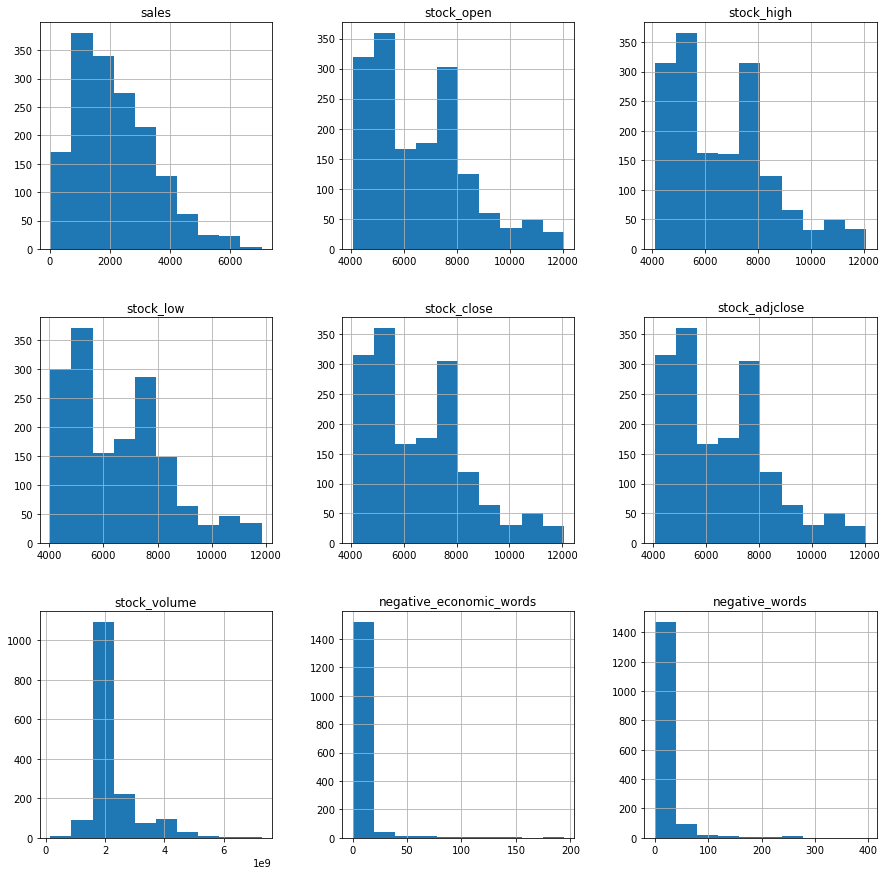

In [98]:
daily_sales_df.hist(figsize=(15, 15))

We proceed to carry out some additional checks on the data.

In [99]:
!pip install pandas-profiling

from pandas_profiling import ProfileReport

In [100]:
profile = ProfileReport(daily_sales_df, title='Pandas Profiling Report')

In [101]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Next, the study of the correlation between variables is deepened by creating a heat map.

In [102]:
!pip install seaborn

import seaborn as sns

We check the possible correlation between variables using a heat map, for which we use the Pandas corr method.

In [103]:
corr = daily_sales_df.corr()

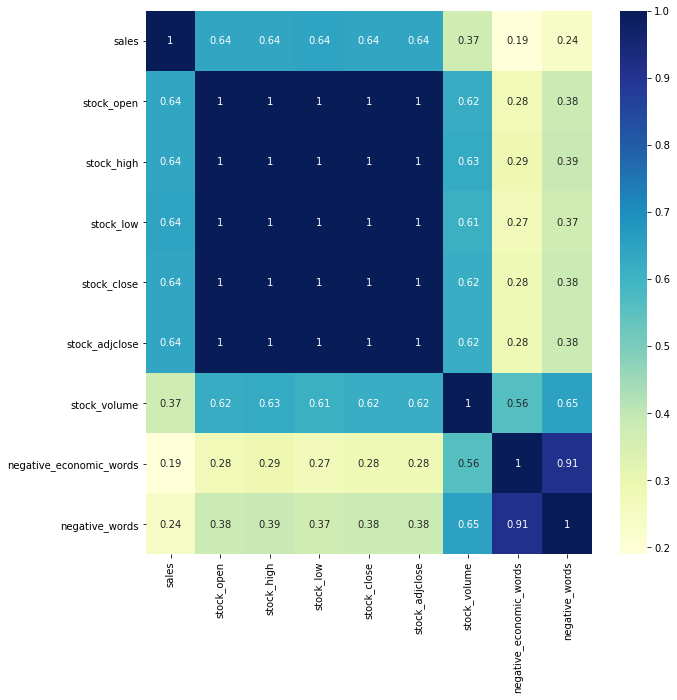

In [104]:
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

As we can see, the correlation heat map provides us with a visual description of the relationship between the variables. Now, we do not want a set of independent variables that has a more or less similar relationship with the dependent variables. If we look at the dependent variable "sales" we make sure that there is no strong correlation with any independent variable.

However, we will try to eliminate the strong dependency between the independent variables "stock_open", "stock_high", "stock_low", "stock_close" and "stock_adjclose" by adding a new variable called "stock_mean" as the mean of the variables "stock_high" and "stock_low", and the resulting correlation is checked again.

In [105]:
daily_sales_df['stock_mean'] = (daily_sales_df.stock_low + daily_sales_df.stock_high) / 2

In [106]:
daily_sales_df = daily_sales_df[['sales', 'stock_volume', 'stock_mean', 'negative_words', 'negative_economic_words']]

In [107]:
corr = daily_sales_df.corr()

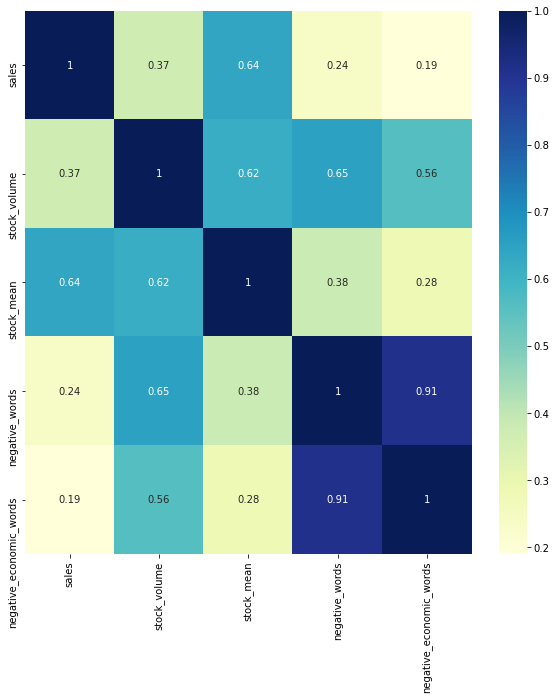

In [108]:
plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.show()

Although a strong correlation between the variables "negative_words" and "negative_economic_words" is still observed, they will be maintained for the application of the predictive model.

We observe in a graph the behavior of daily sales.

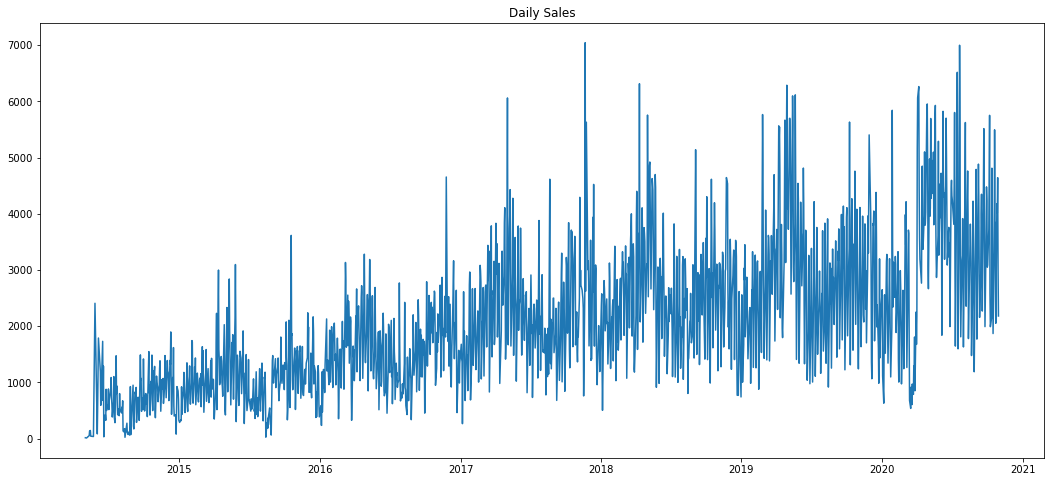

In [109]:
figsize=(18, 8)
plt.figure(figsize=figsize)
plt.title('Daily Sales')
plt.plot(daily_sales_df.index, daily_sales_df.sales)
plt.show()

We look at the behavior of the NASDAQ index stocks.

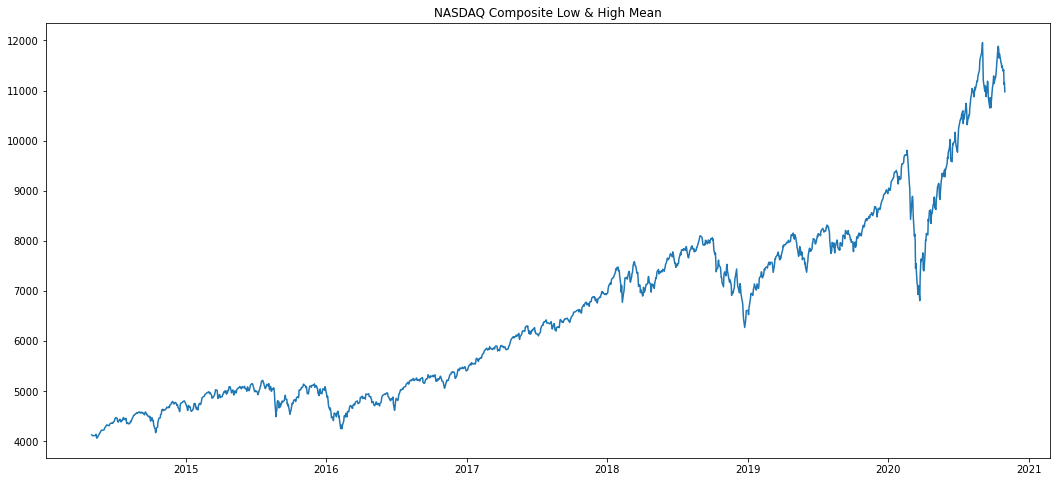

In [110]:
figsize=(18, 8)
plt.figure(figsize=figsize)
plt.title(f'{ticker_name} Low & High Mean')
plt.plot(daily_sales_df.index, daily_sales_df.stock_mean)
plt.show()

We verify that it has a behavior that is certainly similar to that of sales.

We verify that in mid-March 2020 there is a sharp decline in sales, and a strong increase a month later, with sustained growth in the future compared to previous periods.

Then, the same values are observed in a period of time that contains the initial moment of the pandemic (between January and May 2020), verifying that they have a certainly similar behavior.

In [111]:
pandemic_period_date_from = '2020-01-01'
pandemic_period_date_to = '2020-05-31'

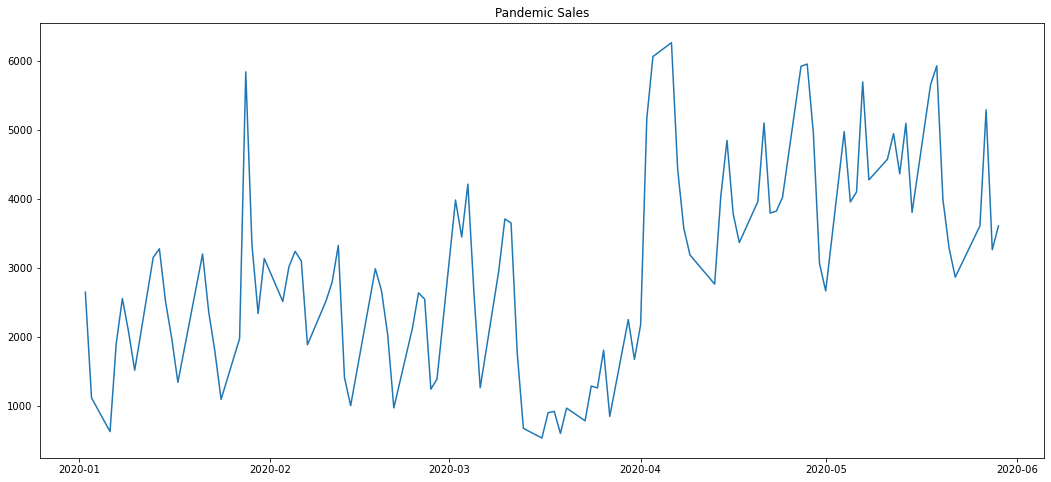

In [112]:
figsize=(18, 8)
plt.figure(figsize=figsize)
plt.title('Pandemic Sales')
plt.plot(daily_sales_df.index[(daily_sales_df.index >= pandemic_period_date_from) & (daily_sales_df.index <= pandemic_period_date_to)], daily_sales_df['sales'][(daily_sales_df.index >= pandemic_period_date_from) & (daily_sales_df.index <= pandemic_period_date_to)])
plt.show()

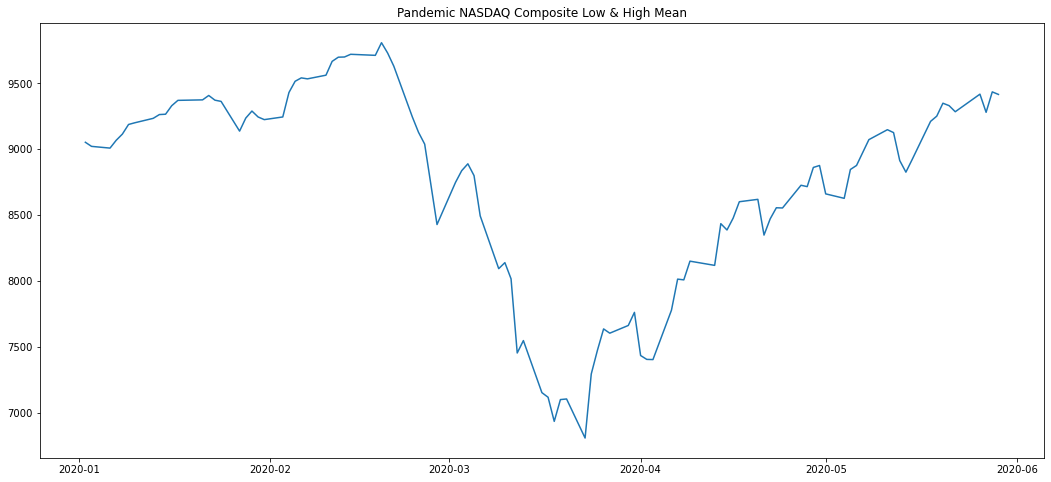

In [113]:
figsize=(18, 8)
plt.figure(figsize=figsize)
plt.title(f'Pandemic {ticker_name} Low & High Mean')
plt.plot(daily_sales_df.index[(daily_sales_df.index >= pandemic_period_date_from) & (daily_sales_df.index <= pandemic_period_date_to)], daily_sales_df.stock_mean[(daily_sales_df.index >= pandemic_period_date_from) & (daily_sales_df.index <= pandemic_period_date_to)])
plt.show()

Finally, the graph of the values of the negative words is observed, verifying that it has an inverse behavior to that of sales and the Nasdaq Composite index.

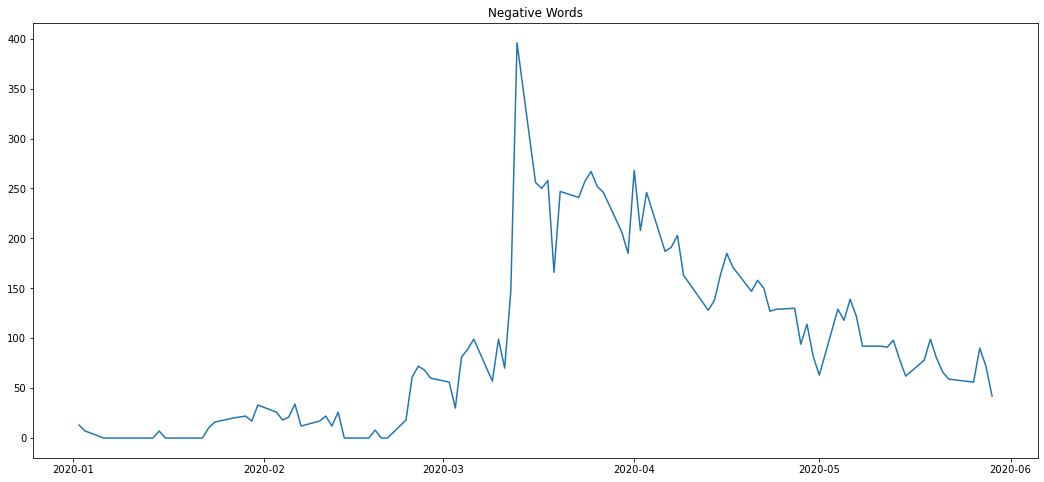

In [114]:
figsize=(18, 8)
plt.figure(figsize=figsize)
plt.title('Negative Words')
plt.plot(daily_sales_df.index[(daily_sales_df.index >= pandemic_period_date_from) & (daily_sales_df.index <= pandemic_period_date_to)], daily_sales_df['negative_words'][(daily_sales_df.index >= pandemic_period_date_from) & (daily_sales_df.index <= pandemic_period_date_to)])
plt.show()

## Prediction model

The training and test data sets are prepared with the independent (exogenous) and dependent (endogenous) variables for our SARIMAX time series predictive model.

In [115]:
daily_sales_df = daily_sales_df.reset_index()

In [116]:
daily_sales_df

date    sales  stock_volume    stock_mean  negative_words  \
0    2014-05-02    16.04    1844790000   4130.475098             0.0   
1    2014-05-05    10.65    1561170000   4112.344971             0.0   
2    2014-05-12    53.54    1880020000   4119.315063             0.0   
3    2014-05-13   135.45    1923480000   4141.569824             0.0   
4    2014-05-15   144.89    2083030000   4067.104980             0.0   
...         ...      ...           ...           ...             ...   
1614 2020-10-26  4176.29    3186950000  11383.344727            43.0   
1615 2020-10-27  4016.97    3079530000  11413.459961            51.0   
1616 2020-10-28  4641.49    3912580000  11124.510254            70.0   
1617 2020-10-29  3006.00    3222460000  11158.910156            91.0   
1618 2020-10-30  2181.25    3662840000  10976.189941            69.0   

      negative_economic_words  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  
...                       ...  
1614                     14.0  
1615                     12.0  
1616                     27.0  
1617                      0.0  
1618                     26.0  

[1619 rows x 6 columns]

We prepare the <strong>X</strong> dataset with the independent (exogenous) variables.

In [117]:
X = daily_sales_df[['date', 'stock_volume', 'stock_mean', 'negative_words', 'negative_economic_words']]

In [118]:
X

date  stock_volume    stock_mean  negative_words  \
0    2014-05-02    1844790000   4130.475098             0.0   
1    2014-05-05    1561170000   4112.344971             0.0   
2    2014-05-12    1880020000   4119.315063             0.0   
3    2014-05-13    1923480000   4141.569824             0.0   
4    2014-05-15    2083030000   4067.104980             0.0   
...         ...           ...           ...             ...   
1614 2020-10-26    3186950000  11383.344727            43.0   
1615 2020-10-27    3079530000  11413.459961            51.0   
1616 2020-10-28    3912580000  11124.510254            70.0   
1617 2020-10-29    3222460000  11158.910156            91.0   
1618 2020-10-30    3662840000  10976.189941            69.0   

      negative_economic_words  
0                         0.0  
1                         0.0  
2                         0.0  
3                         0.0  
4                         0.0  
...                       ...  
1614                     14.0  
1615                     12.0  
1616                     27.0  
1617                      0.0  
1618                     26.0  

[1619 rows x 5 columns]

We prepare the dataset <strong>y</strong> with the dependent variable (endogenous).

In [119]:
y = daily_sales_df[['date', 'sales']]

In [120]:
y

date    sales
0    2014-05-02    16.04
1    2014-05-05    10.65
2    2014-05-12    53.54
3    2014-05-13   135.45
4    2014-05-15   144.89
...         ...      ...
1614 2020-10-26  4176.29
1615 2020-10-27  4016.97
1616 2020-10-28  4641.49
1617 2020-10-29  3006.00
1618 2020-10-30  2181.25

[1619 rows x 2 columns]

We prepare the <strong>train_sales_vals</strong> and <strong>train_exog_vals</strong> datasets with the training data sets from the period 01/01/2016 to 12/31/2019. We dismissed sales prior to 01/01/2016 as they presented irregular sales values (these were the business start-up years).

In [121]:
train_date_from = '2016-01-01'
train_date_to = '2019-12-31'

In [122]:
train_size = int(len(X[(X.date >= train_date_from) & (X.date <= train_date_to)]))

In [123]:
train_size

1006

In [124]:
train_sales_vals = y.sales[(y.date >= train_date_from) & (y.date <= train_date_to)]
train_sales_vals = train_sales_vals.reset_index(drop=True)

In [125]:
train_exog_vals = X[(X.date >= train_date_from) & (X.date <= train_date_to)][['stock_volume', 'stock_mean', 'negative_words', 'negative_economic_words']]
train_exog_vals = train_exog_vals.reset_index(drop=True)

We prepare the <strong>test_sales_vals</strong> and <strong>test_exog_vals</strong> datasets with the test data sets from the period 01/01/2020 to 30/10/2020.

In [126]:
test_date_from = '2020-01-01'
test_date_to = '2020-10-30'

In [127]:
test_size = int(len(y[(y.date >= test_date_from) & (y.date <= test_date_to)]))

In [128]:
test_size

211

In [129]:
test_sales_vals = y.sales[(y.date >= test_date_from) & (y.date <= test_date_to)]
test_sales_vals = test_sales_vals.reset_index(drop=True)

In [130]:
test_exog_vals = X[(X.date >= test_date_from) & (X.date <= test_date_to)][['stock_volume', 'stock_mean', 'negative_words', 'negative_economic_words']]
test_exog_vals = test_exog_vals.reset_index(drop=True)

Next, we proceed to work on the prediction problem. It is important to remember that, since it is a time series prediction problem, it is necessary to test the seasonality of the time series in order to apply the SARIMAX model.

It starts from the observation of the seasonality of the sales values in the period of one year.

In [131]:
!pip install pip install statsmodels

import statsmodels.api as sm

In [132]:
seas_d = sm.tsa.seasonal_decompose(y['sales'], model='add', period=365)

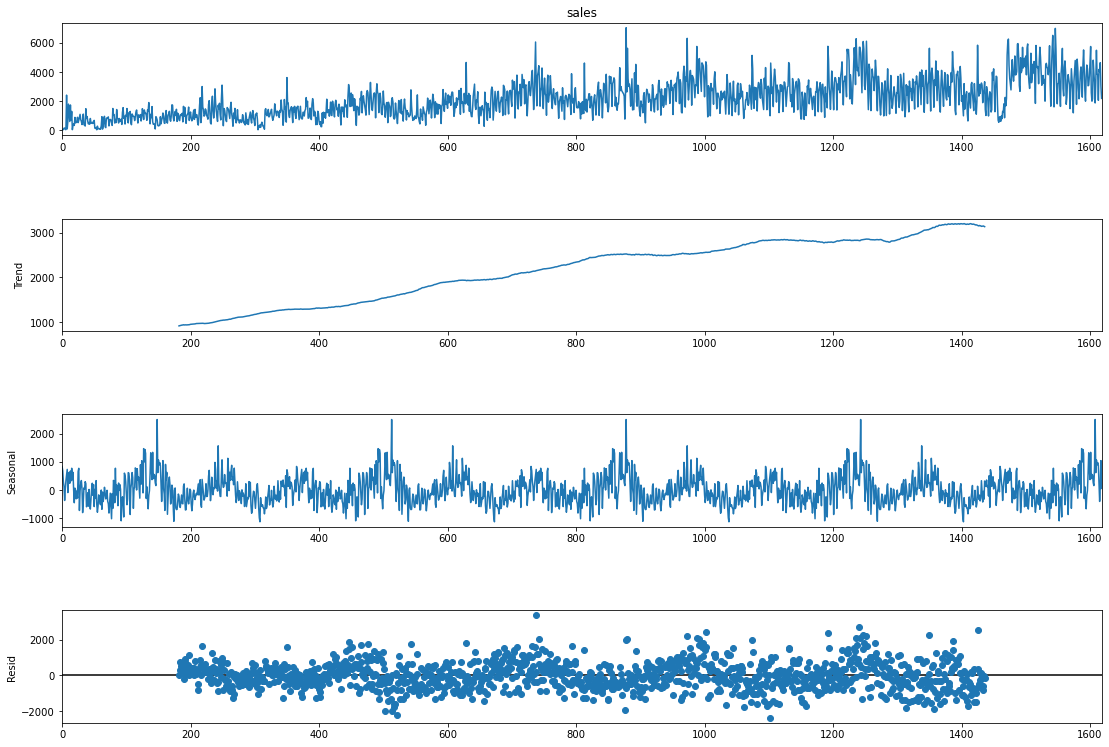

In [133]:
fig = seas_d.plot()
fig.set_figwidth(18)
fig.set_figheight(12)
plt.show()

We check the seasonality of the sales values in the monthly period.

In [134]:
seas_d = sm.tsa.seasonal_decompose(y[y.date >= '2020-01-01']['sales'], model='add', period=30)

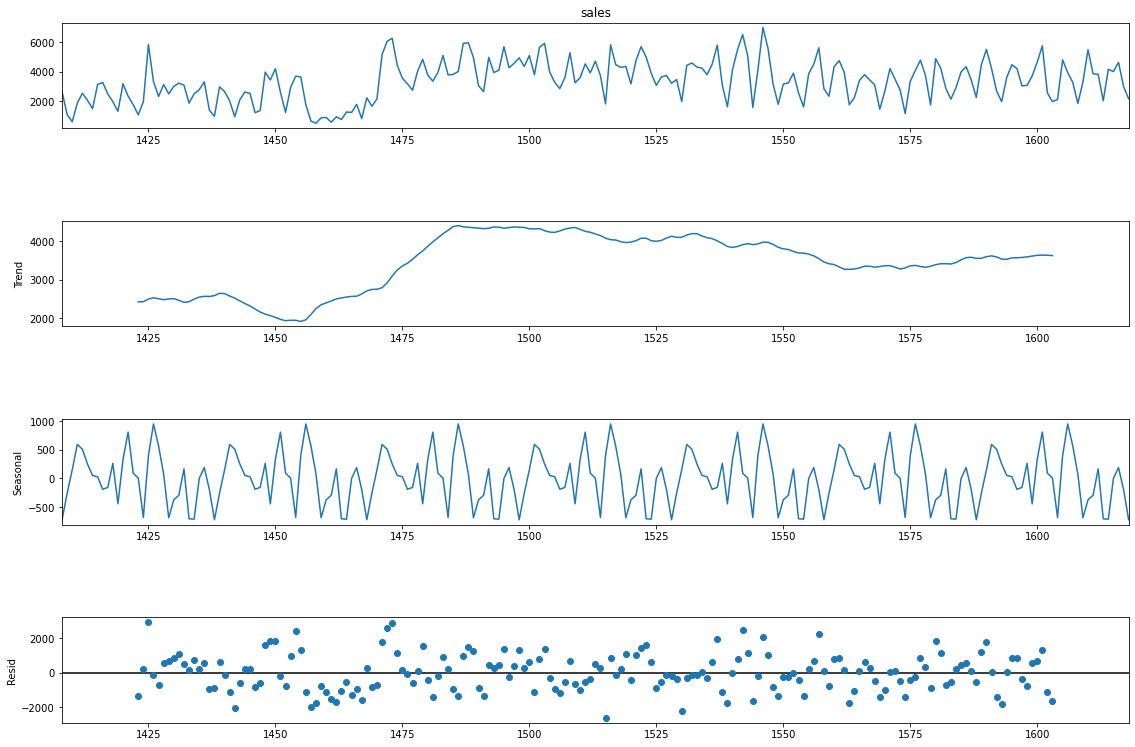

In [135]:
fig = seas_d.plot()
fig.set_figwidth(18)
fig.set_figheight(12)
plt.show()

We check the seasonality of the sales values in the weekly period.

In [136]:
seas_d = sm.tsa.seasonal_decompose(y[y.date >= '2020-01-01']['sales'], model='add', period=7)

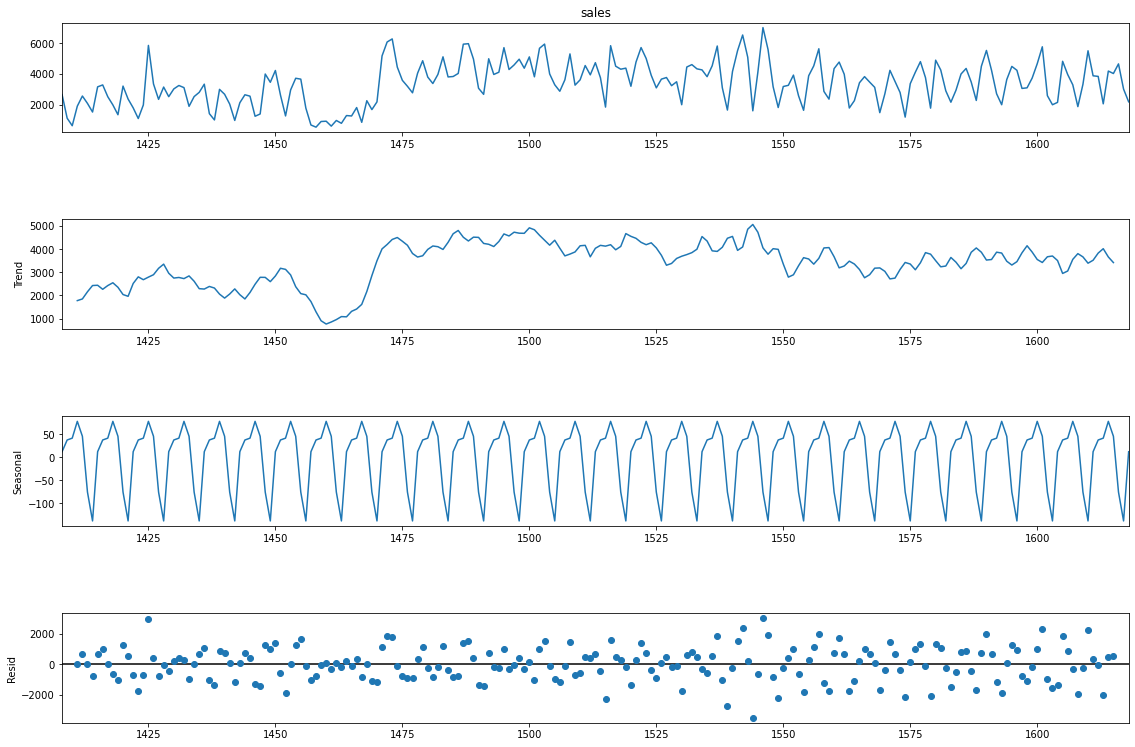

In [137]:
fig = seas_d.plot()
fig.set_figwidth(18)
fig.set_figheight(12)
plt.show()

It is verified that, at least graphically, a clear seasonality is observed in the sales data in the annual, monthly and weekly periods.

If we make the data stationary, then the model can make predictions based on the fact that the mean and variance will remain the same in the future. A stationary series is easier to predict. To check if the data is stationary, we will use the <strong>Augmented Dickey-Fuller (ADF)</strong> test. It is the most popular statistical method to find if the series is stationary or not. Also called the unit root test.

In [138]:
!pip install stattools

from statsmodels.tsa.stattools import adfuller

In [139]:
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    
    for key, val in dftest[4].items():
        dfout[f'critical value ({key})'] = val
    
    if dftest[1] <= 0.05:
        print('Strong evidence against Null Hypothesis')
        print('Reject Null Hypothesis - Data is Stationary')
        print('Data is Stationary for', title)
    else:
        print('Strong evidence for Null Hypothesis')
        print('Accept Null Hypothesis - Data is not Stationary')
        print('Data is NOT Stationary for', title)

We check that the sales data of the training set (from 01/01/2016 to 12/31/2019) are stationary.

In [140]:
test_adf(train_sales_vals, 'Train Sales')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary for Train Sales


We check that the sales data of the test set (from 01/01/2020 onwards) are not stationary.

In [141]:
test_adf(test_sales_vals, 'Test Sales')

Strong evidence for Null Hypothesis
Accept Null Hypothesis - Data is not Stationary
Data is NOT Stationary for Test Sales


We verify that the sales data of the test set (from 01/01/2020 onwards) become stationary by applying the <strong>logarithmic transformation</strong>.

In [142]:
!pip install numpy

import numpy as np

In [143]:
test_adf(np.log10(test_sales_vals), 'Log10 Test Sales')

Strong evidence against Null Hypothesis
Reject Null Hypothesis - Data is Stationary
Data is Stationary for Log10 Test Sales


Based on this, we apply the logarithmic transformation to all datasets to stabilize the variance in the data and make it stationary before feeding it to the model.

In [144]:
train_sales_log = np.log10(train_sales_vals)

In [145]:
test_sales_log = np.log10(test_sales_vals)

In [146]:
train_exog_log = np.log10(train_exog_vals)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [147]:
test_exog_log = np.log10(test_exog_vals)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


In [148]:
from numpy import inf

In [149]:
train_exog_log[train_exog_log.negative_words == -inf] = 0

In [150]:
test_exog_log[test_exog_log.negative_words == -inf] = 0

We apply ARIMA and SARIMAX to our data and see which one works better. For both ARIMA and SARIMA or SARIMAX, we need to know the AR and MA terms to correct any autocorrelation in the differentiated series.

We observe the graphs of the autocorrelation function (ACF) and partial autocorrelation (PACF) of the differentiated series.

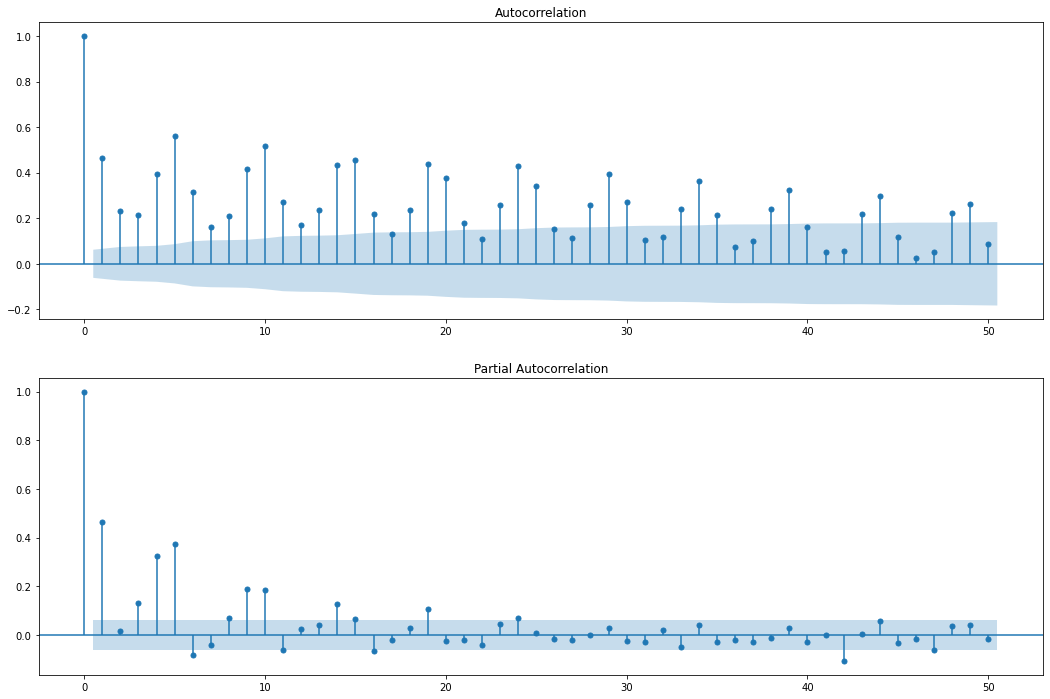

In [151]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12))
fig=sm.tsa.graphics.plot_acf(train_sales_log, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(train_sales_log, lags=50, ax=ax[1])
plt.show()

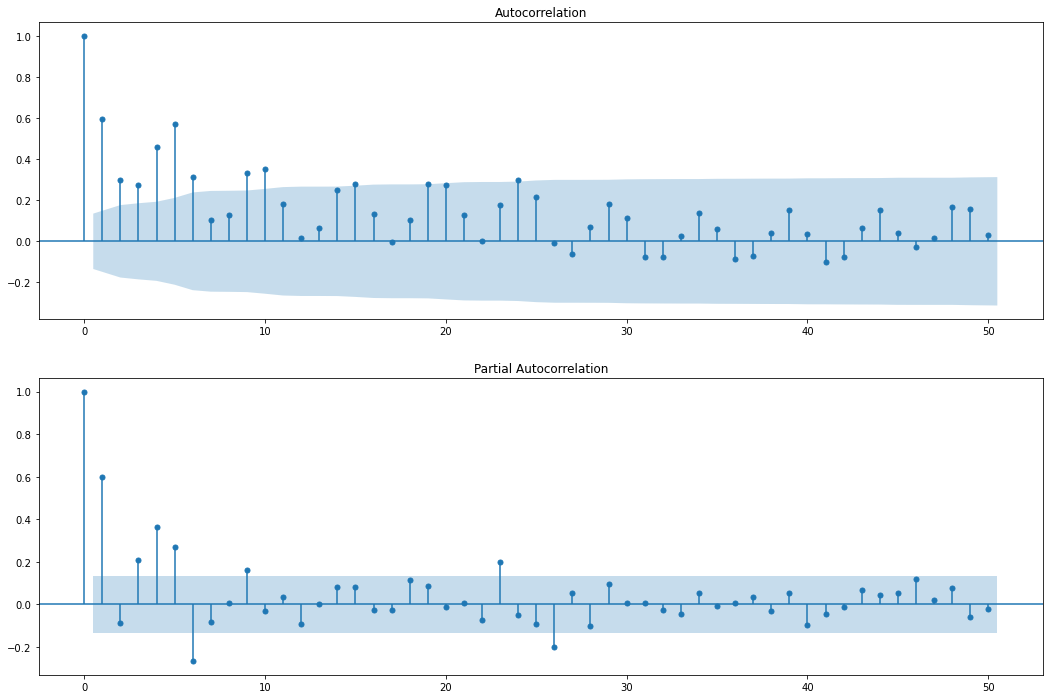

In [152]:
fig, ax = plt.subplots(2, 1, figsize=(18, 12))
fig=sm.tsa.graphics.plot_acf(test_sales_log, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(test_sales_log, lags=50, ax=ax[1])
plt.show()

We see that the PACF plot has a significant peak at lag 1 and lag 2, which means that all higher order autocorrelations are effectively explained by the lag 1 and lag 2 autocorrelations.

We use pyramid auto Arima to perform a step-by-step search for the term AR and MA that gives the lowest value of AIC.

In [153]:
!pip install pmdarima

from pmdarima.arima import auto_arima

In [154]:
stepwise_model = auto_arima(
    train_sales_log,
    exogenous=train_exog_log,
    start_p=0, start_q=0,
    start_P=0, start_Q=0,
    max_p=7, max_q=7,
    d=1, D=1,
    m=7,
    seasonal=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=712.766, Time=0.52 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=24.234, Time=3.54 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=4.73 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=695.554, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=-53.530, Time=3.86 sec
 ARIMA(1,1,0)(2,1,1)[7]             : AIC=inf, Time=12.92 sec
 ARIMA(1,1,0)(1,1,1)[7]             : AIC=inf, Time=4.55 sec
 ARIMA(0,1,0)(2,1,0)[7]             : AIC=100.893, Time=1.59 sec
 ARIMA(2,1,0)(2,1,0)[7]             : AIC=-139.083, Time=3.41 sec
 ARIMA(2,1,0)(1,1,0)[7]             : AIC=-65.209, Time=2.47 sec
 ARIMA(2,1,0)(2,1,1)[7]             : AIC=inf, Time=12.34 sec
 ARIMA(2,1,0)(1,1,1)[7]             : AIC=inf, Time=7.67 sec
 ARIMA(3,1,0)(2,1,0)[7]             : AIC=-233.516, Time=5.83 sec
 ARIMA(3,1,0)(1,1,0)[7]             : AIC=-164.932, Time=3.01 sec
 ARIMA(3,1,0)(2,1,1)[7]             : AIC=inf, Time=15.07 sec
 

In [155]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1006
Model:             SARIMAX(4, 1, 0)x(2, 1, 0, 7)   Log Likelihood                 229.556
Date:                           Sun, 17 Oct 2021   AIC                           -437.111
Time:                                   09:24:58   BIC                           -383.148
Sample:                                        0   HQIC                          -416.600
                                          - 1006                                         
Covariance Type:                             opg                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
stock_volume                     0   4.72e-10          0      1.000   -9.24e-10    9.24e-10
stock_mean                       0   4.72e-10          0      1.000   -9.24e-10    9.24e-10
negative_words                   0   4.72e-10          0      1.000   -9.24e-10    9.24e-10
negative_economic_words          0   4.72e-10          0      1.000   -9.24e-10    9.24e-10
ar.L1                      -0.6904      0.029    -24.119      0.000      -0.747      -0.634
ar.L2                      -0.6693      0.032    -20.607      0.000      -0.733      -0.606
ar.L3                      -0.6099      0.032    -19.326      0.000      -0.672      -0.548
ar.L4                      -0.4388      0.027    -16.337      0.000      -0.491      -0.386
ar.S.L7                    -0.7461      0.033    -22.727      0.000      -0.810      -0.682
ar.S.L14                   -0.3087      0.032     -9.651      0.000      -0.371      -0.246
sigma2                      0.0367      0.001     26.575      0.000       0.034       0.039
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                48.23
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                            -0.32
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.99e+23. Standard errors may be unstable.
"""

The model suggested by auto_arima is SARIMAX, and the values of p, d, q and P, D, Q are 4, 1, 0 and 2, 1, 0, respectively.

At this point, the next data point is predicted and the training data is traversed to predict the next data and add the next data point after the prediction for an additional forecast. This is like a moving window of daily level data.

In [156]:
import warnings

warnings.filterwarnings('ignore')

In [157]:
predictions = list()
predict_log = list()

In [158]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for t in range(len(test_sales_log)):
        stepwise_model.fit(train_sales_log)
        output = stepwise_model.predict(n_periods=1)
        predict_log.append(output[0])
        yhat = 10**output[0]
        predictions.append(yhat)
        obs = test_sales_log.iloc[t]
        train_sales_log = train_sales_log.append(pd.Series(obs), ignore_index=True)
        print('t=%f, predicted=%f, expected=%f' % (t, output[0], obs))
        obs = test_exog_log.iloc[t]
        train_exog_log = train_exog_log.append(pd.Series(obs), ignore_index=True)

t=0.000000, predicted=3.368172, expected=3.423143
t=1.000000, predicted=3.461364, expected=3.049001
t=2.000000, predicted=2.985679, expected=2.799520
t=3.000000, predicted=3.116050, expected=3.278824
t=4.000000, predicted=3.167224, expected=3.407829
t=5.000000, predicted=3.379040, expected=3.317735
t=6.000000, predicted=3.077629, expected=3.181441
t=7.000000, predicted=3.175742, expected=3.498612
t=8.000000, predicted=3.232255, expected=3.515478
t=9.000000, predicted=3.083235, expected=3.399909
t=10.000000, predicted=3.438479, expected=3.296928
t=11.000000, predicted=3.256545, expected=3.128105
t=12.000000, predicted=3.417989, expected=3.505314
t=13.000000, predicted=3.498925, expected=3.373118
t=14.000000, predicted=3.576270, expected=3.252892
t=15.000000, predicted=3.065565, expected=3.040337
t=16.000000, predicted=2.870993, expected=3.296095
t=17.000000, predicted=3.479982, expected=3.766420
t=18.000000, predicted=3.375543, expected=3.523754
t=19.000000, predicted=3.381513, expected

## Results
### Results graph display

The mean square error (RMSE) is used to evaluate the model.

In [159]:
!pip install python-math
!pip install scikit-metrics

import math
from sklearn.metrics import mean_squared_error

In [160]:
error = math.sqrt(mean_squared_error(test_sales_log, predict_log))
print('Test RMSE: %.3f' % error)

Test RMSE: 0.183


Next, for visualization, let's create a data frame with the actual data available and the results of the prediction.

In [161]:
predicted_df = pd.DataFrame()
predicted_df['date'] = daily_sales_df['date'][(daily_sales_df.date >= test_date_from) & (daily_sales_df.date <= test_date_to)]
predicted_df['sales'] = test_sales_vals.values
predicted_df['predicted'] = predictions

In [162]:
predicted_df

date    sales    predicted
1408 2020-01-02  2649.37  2334.380105
1409 2020-01-03  1119.44  2893.102153
1410 2020-01-06   630.26   967.562154
1411 2020-01-07  1900.31  1306.321217
1412 2020-01-08  2557.58  1469.684941
...         ...      ...          ...
1614 2020-10-26  4176.29  3021.504686
1615 2020-10-27  4016.97  4988.939034
1616 2020-10-28  4641.49  3492.655374
1617 2020-10-29  3006.00  3457.910947
1618 2020-10-30  2181.25  2311.154698

[211 rows x 3 columns]

We draw the graph of the predictions in relation to the actual sales.

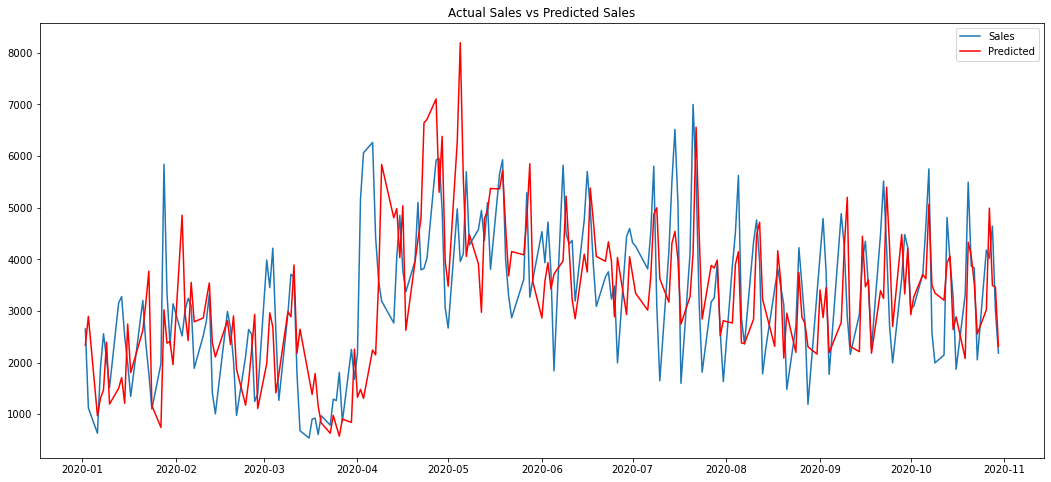

In [163]:
figsize=(18, 8)
plt.figure(figsize=figsize)
plt.title('Actual Sales vs Predicted Sales')
plt.plot(predicted_df.date, predicted_df.sales, label='Sales')
plt.plot(predicted_df.date, predicted_df.predicted, color='red', label='Predicted')
plt.legend(loc='upper right')
plt.show()

We see that the prediction fairly faithfully reproduces the peak of declines in sales in mid-March, as well as the rebound in sales the following month.

## Anomaly detection and visualization

Once with the forecast results and actual data, we proceed to detect anomalies. To do this, the following steps are followed:

1. Calculation of the error term (real-prediction).
2. Calculation of the moving average and the moving standard deviation (the window is one week).
3. Classification of the data with an error of 1.5, 1.75 and 2 standard deviations as limits for low, medium and high anomalies (5% of the data points would be anomalies identified according to this property).

In [227]:
def detect_classify_anomalies(df, window):
    df = df.copy()
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0, inplace=True)
    df['error'] = df['sales'] - df['predicted']
    df['percentage_change'] = ((df['error']) / df['sales']) * 100
    df['meanval'] = df['error'].rolling(window=window).mean()
    df['deviation'] = df['error'].rolling(window=window).std()
    df['-3s'] = df['meanval'] - (2 * df['deviation'])
    df['3s'] = df['meanval'] + (2 * df['deviation'])
    df['-2s'] = df['meanval'] - (1.75 * df['deviation'])
    df['2s'] = df['meanval'] + (1.75 * df['deviation'])
    df['-1s'] = df['meanval'] - (1.5 * df['deviation'])
    df['1s'] = df['meanval'] + (1.5 * df['deviation'])
    cut_list = df[['error', '-3s', '-2s', '-1s', 'meanval', '1s', '2s', '3s']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'].iloc[x])[1][0])(x) for x in range(len(df['error']))]
    severity = {0:3, 1:2, 2:1, 3:0, 4:0, 5:1, 6:2, 7:3}
    region = {0:'NEGATIVE', 1:'NEGATIVE', 2:'NEGATIVE', 3:'NEGATIVE', 4:'POSITIVE', 5:'POSITIVE', 6:'POSITIVE', 7:'POSITIVE'}
    df['color'] = df['impact'].map(severity)
    df['region'] = df['impact'].map(region)
    df['anomaly_points_level_1'] = np.where(df['color'] == 1, df['error'], np.nan)
    df['anomaly_points_level_2'] = np.where(df['color'] == 2, df['error'], np.nan)
    df['anomaly_points_level_3'] = np.where(df['color'] == 3, df['error'], np.nan)
    df = df.sort_values(by='date', ascending=False)
    df.date = pd.to_datetime(df['date'].astype(str), format='%Y-%m-%d')
    return df

In [228]:
classify_df = detect_classify_anomalies(predicted_df, 7)

In [229]:
classify_df.reset_index(inplace=True)

In [230]:
classify_df = classify_df.drop('index', axis=1)

In [231]:
classify_df.date = classify_df.date.dt.strftime('%Y-%m-%d')

In [232]:
classify_df

date    sales    predicted        error  percentage_change  \
0    2020-10-30  2181.25  2311.154698  -129.904698          -5.955516   
1    2020-10-29  3006.00  3457.910947  -451.910947         -15.033631   
2    2020-10-28  4641.49  3492.655374  1148.834626          24.751419   
3    2020-10-27  4016.97  4988.939034  -971.969034         -24.196572   
4    2020-10-26  4176.29  3021.504686  1154.785314          27.650985   
..          ...      ...          ...          ...                ...   
206  2020-01-08  2557.58  1469.684941  1087.895059          42.536111   
207  2020-01-07  1900.31  1306.321217   593.988783          31.257468   
208  2020-01-06   630.26   967.562154  -337.302154         -53.517938   
209  2020-01-03  1119.44  2893.102153 -1773.662153        -158.441913   
210  2020-01-02  2649.37  2334.380105   314.989895          11.889238   

        meanval   deviation          -3s           3s          -2s  \
0     78.074774  828.413641 -1578.752507  1734.902055 -1371.649097   
1     68.730376  831.513731 -1594.297086  1731.757838 -1386.418653   
2    299.323109  885.152660 -1470.982211  2069.628428 -1249.694046   
3    312.237982  900.145858 -1488.053735  2112.529698 -1263.017271   
4    306.187388  910.301783 -1514.416179  2126.790954 -1286.840733   
..          ...         ...          ...          ...          ...   
206         NaN         NaN          NaN          NaN          NaN   
207         NaN         NaN          NaN          NaN          NaN   
208         NaN         NaN          NaN          NaN          NaN   
209         NaN         NaN          NaN          NaN          NaN   
210         NaN         NaN          NaN          NaN          NaN   

              2s          -1s           1s  impact  color    region  \
0    1527.798645 -1164.545687  1320.695235       3      0  NEGATIVE   
1    1523.879405 -1178.540221  1316.000972       3      0  NEGATIVE   
2    1848.340263 -1028.405881  1627.052098       4      0  POSITIVE   
3    1887.493234 -1037.980806  1662.456769       3      0  NEGATIVE   
4    1899.215508 -1059.265287  1671.640062       4      0  POSITIVE   
..           ...          ...          ...     ...    ...       ...   
206          NaN          NaN          NaN       0      3  NEGATIVE   
207          NaN          NaN          NaN       0      3  NEGATIVE   
208          NaN          NaN          NaN       0      3  NEGATIVE   
209          NaN          NaN          NaN       0      3  NEGATIVE   
210          NaN          NaN          NaN       0      3  NEGATIVE   

     anomaly_points_level_1  anomaly_points_level_2  anomaly_points_level_3  
0                       NaN                     NaN                     NaN  
1                       NaN                     NaN                     NaN  
2                       NaN                     NaN                     NaN  
3                       NaN                     NaN                     NaN  
4                       NaN                     NaN                     NaN  
..                      ...                     ...                     ...  
206                     NaN                     NaN             1087.895059  
207                     NaN                     NaN              593.988783  
208                     NaN                     NaN             -337.302154  
209                     NaN                     NaN            -1773.662153  
210                     NaN                     NaN              314.989895  

[211 rows x 19 columns]

Here is a function to display the results. Again, the importance of a clear and comprehensive display helps business users comment on anomalies and makes the results actionable.

The first chart has the error term with the specified upper and lower bound, with the anomalies highlighted it would be easy for a user to interpret / validate. The second graph has actual and predicted values with anomalies highlighted.

In [233]:
!pip install plotly

import plotly.graph_objects as go
from plotly.offline import plot

In [234]:
def plot_anomaly(df, metric_name):
    dates = df.date
    
    bool_array_level_1 = (abs(df['anomaly_points_level_1']) > 0)
    sales_level_1 = df["sales"][-len(bool_array_level_1):]
    anomaly_points_level_1 = bool_array_level_1 * sales_level_1
    anomaly_points_level_1[anomaly_points_level_1 == 0] = np.nan
    
    bool_array_level_2 = (abs(df['anomaly_points_level_2']) > 0)
    sales_level_2 = df["sales"][-len(bool_array_level_2):]
    anomaly_points_level_2 = bool_array_level_2 * sales_level_2
    anomaly_points_level_2[anomaly_points_level_2 == 0] = np.nan
    
    bool_array_level_3 = (abs(df['anomaly_points_level_3']) > 0)
    sales_level_3 = df["sales"][-len(bool_array_level_3):]
    anomaly_points_level_3 = bool_array_level_3 * sales_level_3
    anomaly_points_level_3[anomaly_points_level_3 == 0] = np.nan
    
    color_map = {0:'rgba(228, 222, 249, 0.65)', 1:'yellow', 2:'orange', 3:'red'}
    
    table = go.Table(
        domain = dict(x=[0, 1],
                      y=[0, 0.3]),
        columnwidth = [1, 2],
        header = dict(height=20,
                      values=[['<b>Date</b>'], ['<b>Sales</b>'],
                              ['<b>Predicted</b>'], ['<b>% Difference</b>'], ['<b>Severity (0-3)</b>']],
                      font=dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                      fill=dict(color='#d562be')),
        cells = dict(values=[df.round(2)[k].tolist() for k in ['date', 'sales', 'predicted',
                                                               'percentage_change', 'color']],
                     line=dict(color='#506784'),
                     align=['center'] * 5,
                     font=dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                     suffix=[None] + [''] + [''] + ['%'] + [''],
                     height=27,
                     fill=dict(color=[df['color'].map(color_map)])))
    
    error = go.Scatter(name='Error',
                       x=dates,
                       y=df['error'],
                       xaxis='x1',
                       yaxis='y1',
                       mode='lines',
                       marker=dict(size=12,
                                   line=dict(width=1),
                                   color='darkred'),
                       text='Error')
    
    mvingavrg = go.Scatter(name='Moving Average',
                           x=dates,
                           y=df['meanval'],
                           mode='lines',
                           xaxis='x1',
                           yaxis='y1',
                           marker=dict(size=12,
                                       line=dict(width=1),
                                       color='green'),
                           text='Moving average')
    
    anomalies_level_1 = go.Scatter(name='Anomaly Level 1',
                           x=dates,
                           xaxis='x1',
                           yaxis='y1',
                           y=df['anomaly_points_level_1'],
                           mode='markers',
                           marker=dict(color='yellow',
                                       size=11,
                                       line=dict(color='yellow',
                                                 width=1)))
    
    anomalies_level_2 = go.Scatter(name='Anomaly Level 2',
                           x=dates,
                           xaxis='x1',
                           yaxis='y1',
                           y=df['anomaly_points_level_2'],
                           mode='markers',
                           marker=dict(color='orange',
                                       size=11,
                                       line=dict(color='orange',
                                                 width=1)))
    
    anomalies_level_3 = go.Scatter(name='Anomaly Level 3',
                           x=dates,
                           xaxis='x1',
                           yaxis='y1',
                           y=df['anomaly_points_level_3'],
                           mode='markers',
                           marker=dict(color='red',
                                       size=11,
                                       line=dict(color='red',
                                                 width=1)))
    
    upper_bound = go.Scatter(name='Upper Confidence Interval',
                             x=dates,
                             showlegend=False,
                             xaxis='x1',
                             yaxis='y1',
                             y=df['3s'],
                             marker=dict(color='#444'),
                             line=dict(color=('rgb(23, 96, 167)'),
                                       width=2,
                                       dash='dash'),
                             fillcolor='rgba(68, 68, 68, 0.3)',
                             fill='tonexty')
    
    lower_bound = go.Scatter(name='Confidence Interval',
                             x=dates,
                             xaxis='x1',
                             yaxis='y1',
                             y=df['-3s'],
                             marker=dict(color='#444'),
                             line=dict(color=('rgb(23, 96, 167)'),
                                       width=2,
                                       dash='dash'),
                             fillcolor='rgba(68, 68, 68, 0.3)',
                             fill='tonexty')
    
    sales = go.Scatter(name='Sales',
                       x=dates,
                       y=df['sales'],
                       xaxis='x2',
                       yaxis='y2',
                       mode='lines',
                       marker=dict(size=12,
                                   line=dict(width=1),
                                   color='blue'))
    
    predicted = go.Scatter(name='Predicted',
                           x=dates,
                           y=df['predicted'],
                           xaxis='x2',
                           yaxis='y2',
                           mode='lines',
                           marker=dict(size=12,
                                       line=dict(width=1),
                                       color='silver'))
    
    anomalies_map_level_1 = go.Scatter(name='Anomaly Sales Level 1',
                               showlegend=False,
                               x=dates,
                               y=anomaly_points_level_1,
                               mode='markers',
                               xaxis='x2',
                               yaxis='y2',
                               marker=dict(color='yellow',
                                           size=11,
                                           line=dict(color='yellow',
                                                     width=1)))
    
    anomalies_map_level_2 = go.Scatter(name='Anomaly Sales Level 2',
                               showlegend=False,
                               x=dates,
                               y=anomaly_points_level_2,
                               mode='markers',
                               xaxis='x2',
                               yaxis='y2',
                               marker=dict(color='orange',
                                           size=11,
                                           line=dict(color='orange',
                                                     width=1)))
    
    anomalies_map_level_3 = go.Scatter(name='Anomaly Sales Level 3',
                               showlegend=False,
                               x=dates,
                               y=anomaly_points_level_3,
                               mode='markers',
                               xaxis='x2',
                               yaxis='y2',
                               marker=dict(color='red',
                                           size=11,
                                           line=dict(color='red',
                                                     width=1)))
    
    axis = dict(showline=True,
                zeroline=False,
                showgrid=True,
                mirror=True,
                ticklen=4,
                gridcolor='#ffffff',
                tickfont=dict(size=10))
    
    layout = dict(width=950,
                  height=950,
                  autosize=False,
                  title=metric_name,
                  margin=dict(l=0, r=0, t=50, b=10),
                  showlegend=True,
                  legend=dict(font=dict(size=10)),
                  xaxis1=dict(axis,
                              **dict(domain=[0, 1],
                                     anchor='y1',
                                     showticklabels=True)),
                  xaxis2=dict(axis,
                              **dict(domain=[0, 1],
                                     anchor='y2',
                                     showticklabels=True)),
                  yaxis1=dict(axis,
                              **dict(domain=[0.70, 1],
                                     anchor='x1',
                                     hoverformat='.2f')),
                  yaxis2=dict(axis,
                              **dict(domain=[0.34, 0.64],
                                     anchor='x2',
                                     hoverformat='.2f')))
    
    fig = go.Figure(data=[table, upper_bound, lower_bound, sales,
                          predicted, mvingavrg, error,
                          anomalies_level_1, anomalies_level_2, anomalies_level_3,
                          anomalies_map_level_1, anomalies_map_level_2, anomalies_map_level_3],
                    layout=layout)
    
    return plot(fig, filename='./output/anomaly_detection.html')

In [235]:
plot_anomaly(classify_df, 'Daily Sales Anomaly Detection')

'./output/anomaly_detection.html'

By using a moving average and standard deviation here, you avoid continuous false anomalies during scenarios such as big sales days. The first peak or dip is highlighted, after which the thresholds are adjusted. Also, the table providing actual data predicted the change and conditional formatting based on the level of anomalies.

Finally, an alternative is proposed to detect anomalies, in this case due to different levels of percentage of error between the real and predicted values.

In [236]:
def detect_classify_anomalies_percentages(df, window):
    df = df.copy()
    df.replace([np.inf, -np.inf], np.NaN, inplace=True)
    df.fillna(0, inplace=True)
    df['error'] = abs(df['sales'] - df['predicted'])
    df['percentage_change'] = ((df['error']) / df['sales']) * 100
    df['25p_error'] = (df['sales'] * 0.25)
    df['50p_error'] = (df['sales'] * 0.5)
    df['75p_error'] = (df['sales'] * 0.75)
    df['100p_error'] = (df['sales'] * 1)
    cut_list = df[['error', '25p_error', '50p_error', '75p_error', '100p_error']]
    cut_values = cut_list.values
    cut_sort = np.sort(cut_values)
    df['impact'] = [(lambda x: np.where(cut_sort == df['error'].iloc[x])[1][0])(x) for x in range(len(df['error']))]
    severity = {0:0, 1:1, 2:2, 3:3, 4:4}
    df['color'] = df['impact'].map(severity)
    df['anomaly_points_level_1'] = np.where(df['color'] == 1, df['error'], np.nan)
    df['anomaly_points_level_2'] = np.where(df['color'] == 2, df['error'], np.nan)
    df['anomaly_points_level_3'] = np.where(df['color'] == 3, df['error'], np.nan)
    df['anomaly_points_level_4'] = np.where(df['color'] == 4, df['error'], np.nan)
    df = df.sort_values(by='date', ascending=False)
    df.date = pd.to_datetime(df['date'].astype(str), format='%Y-%m-%d')
    return df

In [237]:
classify_df = detect_classify_anomalies_percentages(predicted_df, 7)

In [238]:
classify_df.reset_index(inplace=True)

In [239]:
classify_df = classify_df.drop('index', axis=1)

In [240]:
classify_df.date = classify_df.date.dt.strftime('%Y-%m-%d')

In [241]:
classify_df

date    sales    predicted        error  percentage_change  \
0    2020-10-30  2181.25  2311.154698   129.904698           5.955516   
1    2020-10-29  3006.00  3457.910947   451.910947          15.033631   
2    2020-10-28  4641.49  3492.655374  1148.834626          24.751419   
3    2020-10-27  4016.97  4988.939034   971.969034          24.196572   
4    2020-10-26  4176.29  3021.504686  1154.785314          27.650985   
..          ...      ...          ...          ...                ...   
206  2020-01-08  2557.58  1469.684941  1087.895059          42.536111   
207  2020-01-07  1900.31  1306.321217   593.988783          31.257468   
208  2020-01-06   630.26   967.562154   337.302154          53.517938   
209  2020-01-03  1119.44  2893.102153  1773.662153         158.441913   
210  2020-01-02  2649.37  2334.380105   314.989895          11.889238   

     25p_error  50p_error  75p_error  100p_error  impact  color  \
0     545.3125   1090.625  1635.9375     2181.25       0      0   
1     751.5000   1503.000  2254.5000     3006.00       0      0   
2    1160.3725   2320.745  3481.1175     4641.49       0      0   
3    1004.2425   2008.485  3012.7275     4016.97       0      0   
4    1044.0725   2088.145  3132.2175     4176.29       1      1   
..         ...        ...        ...         ...     ...    ...   
206   639.3950   1278.790  1918.1850     2557.58       1      1   
207   475.0775    950.155  1425.2325     1900.31       1      1   
208   157.5650    315.130   472.6950      630.26       2      2   
209   279.8600    559.720   839.5800     1119.44       4      4   
210   662.3425   1324.685  1987.0275     2649.37       0      0   

     anomaly_points_level_1  anomaly_points_level_2  anomaly_points_level_3  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3                       NaN                     NaN                     NaN   
4               1154.785314                     NaN                     NaN   
..                      ...                     ...                     ...   
206             1087.895059                     NaN                     NaN   
207              593.988783                     NaN                     NaN   
208                     NaN              337.302154                     NaN   
209                     NaN                     NaN                     NaN   
210                     NaN                     NaN                     NaN   

     anomaly_points_level_4  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
..                      ...  
206                     NaN  
207                     NaN  
208                     NaN  
209             1773.662153  
210                     NaN  

[211 rows x 15 columns]

In [242]:
def plot_anomaly_percentages(df, metric_name):
    dates = df.date
    
    bool_array_level_1 = (abs(df['anomaly_points_level_1']) > 0)
    sales_level_1 = df["sales"][-len(bool_array_level_1):]
    anomaly_points_level_1 = bool_array_level_1 * sales_level_1
    anomaly_points_level_1[anomaly_points_level_1 == 0] = np.nan
    
    bool_array_level_2 = (abs(df['anomaly_points_level_2']) > 0)
    sales_level_2 = df["sales"][-len(bool_array_level_2):]
    anomaly_points_level_2 = bool_array_level_2 * sales_level_2
    anomaly_points_level_2[anomaly_points_level_2 == 0] = np.nan
    
    bool_array_level_3 = (abs(df['anomaly_points_level_3']) > 0)
    sales_level_3 = df["sales"][-len(bool_array_level_3):]
    anomaly_points_level_3 = bool_array_level_3 * sales_level_3
    anomaly_points_level_3[anomaly_points_level_3 == 0] = np.nan
    
    bool_array_level_4 = (abs(df['anomaly_points_level_4']) > 0)
    sales_level_4 = df["sales"][-len(bool_array_level_4):]
    anomaly_points_level_4 = bool_array_level_4 * sales_level_4
    anomaly_points_level_4[anomaly_points_level_4 == 0] = np.nan
    
    color_map = {0:'rgba(228, 222, 249, 0.65)', 1:'yellow', 2:'orange', 3:'red', 4:'darkred'}
    
    table = go.Table(
        domain = dict(x=[0, 1],
                      y=[0, 0.45]),
        columnwidth = [1, 2],
        header = dict(height=20,
                      values=[['<b>Date</b>'], ['<b>Sales</b>'],
                              ['<b>Predicted</b>'], ['<b>% Difference</b>'], ['<b>Severity (0-3)</b>']],
                      font=dict(color=['rgb(45, 45, 45)'] * 5, size=14),
                      fill=dict(color='#d562be')),
        cells = dict(values=[df.round(2)[k].tolist() for k in ['date', 'sales', 'predicted',
                                                               'percentage_change', 'color']],
                     line=dict(color='#506784'),
                     align=['center'] * 5,
                     font=dict(color=['rgb(40, 40, 40)'] * 5, size=12),
                     suffix=[None] + [''] + [''] + ['%'] + [''],
                     height=27,
                     fill=dict(color=[df['color'].map(color_map)])))
    
    sales = go.Scatter(name='Sales',
                       x=dates,
                       y=df['sales'],
                       xaxis='x1',
                       yaxis='y1',
                       mode='lines',
                       marker=dict(size=12,
                                   line=dict(width=1),
                                   color='blue'))
    
    predicted = go.Scatter(name='Predicted',
                           x=dates,
                           y=df['predicted'],
                           xaxis='x1',
                           yaxis='y1',
                           mode='lines',
                           marker=dict(size=12,
                                       line=dict(width=1),
                                       color='silver'))
    
    anomalies_map_level_1 = go.Scatter(name='Anomaly Sales Level 1',
                               x=dates,
                               y=anomaly_points_level_1,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color='yellow',
                                           size=11,
                                           line=dict(color='yellow',
                                                     width=1)))
    
    anomalies_map_level_2 = go.Scatter(name='Anomaly Sales Level 2',
                               x=dates,
                               y=anomaly_points_level_2,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color='orange',
                                           size=11,
                                           line=dict(color='orange',
                                                     width=1)))
    
    anomalies_map_level_3 = go.Scatter(name='Anomaly Sales Level 3',
                               x=dates,
                               y=anomaly_points_level_3,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color='red',
                                           size=11,
                                           line=dict(color='red',
                                                     width=1)))
    
    anomalies_map_level_4 = go.Scatter(name='Anomaly Sales Level 4',
                               x=dates,
                               y=anomaly_points_level_4,
                               mode='markers',
                               xaxis='x1',
                               yaxis='y1',
                               marker=dict(color='darkred',
                                           size=11,
                                           line=dict(color='darkred',
                                                     width=1)))
    
    axis = dict(showline=True,
                zeroline=False,
                showgrid=True,
                mirror=True,
                ticklen=4,
                gridcolor='#ffffff',
                tickfont=dict(size=6))
    
    layout = dict(width=950,
                  height=950,
                  autosize=False,
                  title=metric_name,
                  margin=dict(l=0, r=0, t=50, b=10),
                  showlegend=True,
                  legend=dict(yanchor="top",
                              y=0.99,
                              xanchor="left",
                              x=0.01,
                              font=dict(size=10)),
                  xaxis1=dict(axis,
                              **dict(domain=[0, 1],
                                     anchor='y1',
                                     showticklabels=True)),
                  yaxis1=dict(axis,
                              **dict(domain=[0.5, 1],
                                     anchor='x1',
                                     hoverformat='.2f')))
    
    fig = go.Figure(data=[table, sales, predicted,
                          anomalies_map_level_1, anomalies_map_level_2, anomalies_map_level_3, anomalies_map_level_4],
                    layout=layout)
    
    return plot(fig, filename='./output/anomaly_detection_percentages.html')

In [243]:
plot_anomaly_percentages(classify_df, "Daily Sales Anomaly Detection (by percentages)")

'./output/anomaly_detection_percentages.html'